# Intro to Time Series in Python

- Recognize datetime objects in Python
- Apply various formats to datetime objects



## Time Series Basics

- What is a time series? What is required to be considered time series data?

- A time series is any data in which the rows represent different points in time. It can be just a date, just a time, or a combination of both date and time.
- A time series may have rows that represent evenly spaced times or the rows may represent unevenly spaced times.
     - If the times are evenly spaced, the time series has a frequency. This means there is a fixed distance between each observation/row (e.g. daily, monthly, yearly, etc)

**Representing Time Series in Python**

- There are 2 primary ways we will represent date/time with Python:
    - Python's datetime module with datetime variables.
        https://docs.python.org/3/library/datetime.html
    - Pandas' Custom Datetime Classes are built on top of Python's datetime objects.
        https://pandas.pydata.org/docs/user_guide/timeseries.html
- Pandas makes it easy to convert any column of date/time values into a "datetime" datatype but uses its own classes which work similarly to standard Python datetime variables.

**datetime Objects (Basic Python)**

- Python has a datetime module that has a date class (dates without hours/minutes/seconds), a time class (hours/minutes/seconds without a date) and a datetime class, which is a combination of both.
- We will use the datetime class as it is the most flexible.

First, we must import the datetime library:

In [1]:
import datetime as dt



dt has .datetime methods. For example, we can obtain the current date and time with .now()

In [2]:
## You can obtain the current date and time with .now()
now = dt.datetime.now()
now



datetime.datetime(2023, 9, 24, 14, 21, 37, 543533)

**Note that your output will be different, and should be the current date and time.**

Notice the formatting of the output: It contains the year, month, day, hour, minute, second, and microsecond.

We can extract each of these individual pieces of the date and time as attributes:

- For Example:
    - .to obtain just the year, use .year
    - to obtain just the month, use .month
    - etc. 

In [3]:
## use datetime attribute to obtain just the year
now.year



2023

### Datetime Formatting

**Displayed**

- When datetime variables are displayed, we see all of the individual pieces of the date as a list.

In [4]:
## display using display function
display(now)



datetime.datetime(2023, 9, 24, 14, 21, 37, 543533)

In [5]:
# display by leaving as final line in cell
now



datetime.datetime(2023, 9, 24, 14, 21, 37, 543533)

In [9]:
## Printed
## When datetime variables are printed, they look very different:

print(now)

2023-09-24 14:21:37.543533


- As we can see, this looks a lot closer to how we would expect a date and time to look.
- Datetime objects have a specific date format.
    - The default format for a datetime object is:
        - {4 digit year}-{2 digit month}-{2 digit day} {hour in 24 hour time}:{minute}:{seconds}.{microseconds}
    - We can represent this format using a format string: "%Y-%m-%d %H:%M:%S.%f" (which we will explain in the next section)
- Datetime objects have a method that controls which format is used for printed/text versions of the date, called .strftime.

### Datetime.strftime
As you may imagine, there are many options for how you choose to format dates and times! Refer to Documentation for strftime for a table of format codes. These codes allow you to specify what type of date formatting should be used.

**Some examples of formatting options:**

**For the day of the month**:

One option is:

- %d: 0-padded 2-digit day of the month (e.g. 01, 12, 26, etc)

Try it now and see:

In [10]:
# just output the day with a leading 0 if needed
format_a = "%d"
now.strftime(format_a)


'24'

Notice that since we only specified a format for day in format_a, our output only included the day of the month.

**For month:**

A few options are:

- B: full month name (e.g. January, February)
- %b: abbreviated month name (e.g. Jan, Feb, etc)
- %m: 0-padded 2-digit month of the year (e.g. 01,06,11,12)

Let's try adding the full month name before our day of the month

In [11]:
# Add full month name to day of month
format_b = "%B %d"
now.strftime(format_b)


'September 24'

Try some of the other options for month! Which do you think looks the best?


**For the day of the week:**

One option for day of the week:

- %a: Weekday as the locale’s abbreviated name. (e.g. "Sun, Mon")

Let's start with the day of the week, followed by a comma.

- Notice that any additional spacing or characters used when defining the format will be included in the final string.

In [12]:
# Add day of the week to month and day
format_c = "%a, %B %d"
now.strftime(format_c)


'Sun, September 24'

**For the year:**

A few options include:

- %Y: 4-digit year (2000, 2022, etc)
- %y: 2-digit 0-padded year without century (eg. 00,22, etc)

Let's say we just want to output the abbreviated month and the 2-digit year

In [13]:
# include abbreviated month and 2 digit year
format_d = "%b %y"
now.strftime(format_d)


'Sep 23'

**For Time:**

- For quick/easy 24-hour military time with minutes and seconds:
    - %T (e.g. 17:04:49)
- For the hour of the day:
    - %H: 0-padded 24-hour time (e.g. 01, 12, 13,23)
    - %I: 0-padded 12-hour time (e.g. 01, 12, 01, 11)
        - %p: AM/PM
- For minutes:
    - %M: 0-padded 2-digit minutes
- For seconds:
    - %S

The code below defines the default datetime format with all of the codes used.

In [14]:
## the default datetime format
default ="%Y-%m-%d %H:%M:%S.%f"
print(now)
now.strftime(default)



2023-09-24 14:21:37.543533


'2023-09-24 14:21:37.543533'

Let's try some time formats. Include the date with slashs between and add the 12-hour time with AM or PM. Do not include milliseconds.

In [15]:
# Example US Formatted 12-hour date/time with AM/PM
fmt = "%m/%d/%Y %I:%M:%S %p"
now.strftime(fmt)



'09/24/2023 02:21:37 PM'

In [16]:
# 24 hour time with no date

## just the time (24 hour time)
now.strftime("%T")



'14:21:37'

**Summary**

This lesson introduced time series as any data that has a time, date, or time and date component. We also explored the datetime class in basic Python and demonstrated several options for changing the formatting with .strftime(). There are so many options for formatting! You won't remember the codes, but you should know where to find them and how to apply them to achieve what you are looking for in your datetime output.

# Pandas Datetime

Panda's Datetime Functionality

So far, we have just been exploring datetime with the current date and time. Let's look at a data set that has a time series feature. We will be using the Daily Climate Time Series Dataset from Kaggle.

https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

In [17]:
import pandas as pd
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"
df = pd.read_csv(url)
df.info()
df.head(3)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


date   meantemp  humidity  wind_speed  meanpressure
0  2013-01-01  10.000000      84.5    0.000000   1015.666667
1  2013-01-02   7.400000      92.0    2.980000   1017.800000
2  2013-01-03   7.166667      87.0    4.633333   1018.666667

- In the above dataset, we can see that we have a date column. According to our .info(), this column is still a string ("object" dtype)
- From our .head(), we can see that the date column seems to formatted as
    - 4-digit year, a dash, 2 digit month, a dash, and 2 digit day.
    - there is no time information, just the date.

**pd.to_datetime**

Pandas has a very helpful function called to_datetime that can intelligently convert a column into the "datetime" data type.

   - pd.to_datetime Documentation

Let's convert our date column to datetime and then check our .info() and .head() again. Note, that we are keeping the original "date" column as a string, and adding an additional column.

In [18]:
#Add a datetime column based on the string in the "date" column
df['datetime'] = pd.to_datetime(df['date'])
df.info()
df.head(3)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   object        
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
 5   datetime      1462 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.7+ KB


date   meantemp  humidity  wind_speed  meanpressure   datetime
0  2013-01-01  10.000000      84.5    0.000000   1015.666667 2013-01-01
1  2013-01-02   7.400000      92.0    2.980000   1017.800000 2013-01-02
2  2013-01-03   7.166667      87.0    4.633333   1018.666667 2013-01-03

We can see that our new "datetime" column's dtype is listed as "datetime64[ns]" and the original date is still a string.

- Note: [ns] is indicating nano-second precision.

- Notice, however, that the values stored in the date and datetime columns both look the same in the output!
    - This is misleading, because when viewed as a dataframe or series, the output will always show the string version of the datetime even if it is actually a datetime object.
- Let's slice out 1 value from both columns with .loc and see how the values look when viewed alone.

In [19]:
## preview first row from the date column (string)
df.loc[0,'date']



'2013-01-01'

In [20]:
## preview first row from the datetime column (datetime64[ns])
df.loc[0,'datetime']



Timestamp('2013-01-01 00:00:00')

- When viewed single objects, NOW we can see the difference. The values stored in our new 'datetime' column are a special new type of object called a Timestamp.
- The Timestamp class is the simplest datetime variable type in Pandas and shares much of the same functionality as the basic Python datetime class.
- We can use .strftime with Pandas Timestamps just as we demonstrated with basic Python datetime class in the previous lesson. The formatting codes will also be the same. 

For example,

- If you wanted "January 01, 2013", you would use: "%B %d, %Y".

In [21]:
## demonstrate format code
fmt = "%B %d, %Y"
df.loc[0,'datetime'].strftime(fmt)



'January 01, 2013'

**Using the .dt. accessor for a datetime column**

    - Just like we can slice out a string column and use .str. to access string methods, Pandas also has a .dt. for datetime columns.

**.dt.strftime**

Here we will apply the desired format and create an entire new column:

In [24]:
df['datetime_fmt'] = df['datetime'].dt.strftime(fmt)
df['datetime_fmt']

##Important Note: .dt.strftime returns a STRING 
# not an actual datetime column. (notice in the 
# output below that the "datetime_fmt" column is an "object" dtype)

0        January 01, 2013
1        January 02, 2013
2        January 03, 2013
3        January 04, 2013
4        January 05, 2013
              ...        
1457    December 28, 2016
1458    December 29, 2016
1459    December 30, 2016
1460    December 31, 2016
1461     January 01, 2017
Name: datetime_fmt, Length: 1462, dtype: object

In [23]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   object        
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
 5   datetime      1462 non-null   datetime64[ns]
 6   datetime_fmt  1462 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 80.1+ KB


Using .dt.strftime is fine for when we simply want to display dates, but when we actually want to continue to use the feature as a datetime column, we must accept the default formatting.

The good news is that pandas is very flexible in how WE format our dates when slicing a datetime column. This is demonstrated below.


**.dt. year/month/day/hour/etc**

With the datetime object, we have a great deal of flexibility in accessing the specific information we want. For example, we could obtain just the year.

In [25]:
df['datetime'].dt.year.head()



0    2013
1    2013
2    2013
3    2013
4    2013
Name: datetime, dtype: int32

To clarify, if we were to try this on our "datetime_fmt" column (which is just a string), it will not work! Try the following code to demonstrate the value of using the datetime object!

In [27]:
df['datetime'].dt.month.head()



0    1
1    1
2    1
3    1
4    1
Name: datetime, dtype: int32

In [28]:
## fiscal year quarter
df['datetime'].dt.quarter.head()



0    1
1    1
2    1
3    1
4    1
Name: datetime, dtype: int32

In [29]:
## day of the week - numeric
df['datetime'].dt.day_of_week.head()



0    1
1    2
2    3
3    4
4    5
Name: datetime, dtype: int32

In [30]:
## day of the week - String name
df['datetime'].dt.day_name().head()



0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: datetime, dtype: object

## Setting a Datetime Index

Before we can start slicing our data using the datetime object, we will need to make the datetime column the index for the DataFrame or Series.

In [31]:
df = df.set_index('datetime')
df


date   meantemp    humidity  wind_speed  meanpressure  \
datetime                                                                  
2013-01-01  2013-01-01  10.000000   84.500000    0.000000   1015.666667   
2013-01-02  2013-01-02   7.400000   92.000000    2.980000   1017.800000   
2013-01-03  2013-01-03   7.166667   87.000000    4.633333   1018.666667   
2013-01-04  2013-01-04   8.666667   71.333333    1.233333   1017.166667   
2013-01-05  2013-01-05   6.000000   86.833333    3.700000   1016.500000   
...                ...        ...         ...         ...           ...   
2016-12-28  2016-12-28  17.217391   68.043478    3.547826   1015.565217   
2016-12-29  2016-12-29  15.238095   87.857143    6.000000   1016.904762   
2016-12-30  2016-12-30  14.095238   89.666667    6.266667   1017.904762   
2016-12-31  2016-12-31  15.052632   87.000000    7.325000   1016.100000   
2017-01-01  2017-01-01  10.000000  100.000000    0.000000   1016.000000   

                 datetime_fmt  
datetime                       
2013-01-01   January 01, 2013  
2013-01-02   January 02, 2013  
2013-01-03   January 03, 2013  
2013-01-04   January 04, 2013  
2013-01-05   January 05, 2013  
...                       ...  
2016-12-28  December 28, 2016  
2016-12-29  December 29, 2016  
2016-12-30  December 30, 2016  
2016-12-31  December 31, 2016  
2017-01-01   January 01, 2017  

[1462 rows x 6 columns]

In [32]:
# If we check the DataFrame's .index, we can 
# confirm that it is indeed still datetime dtype.

df.index



DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

## Slicing a Time Series with pandas

- Pandas is incredibly flexible/generous in processing dates when we use .loc.
- For example, if we wanted every row from the year 2013, we can just use .loc and a string version of the year

In [33]:
df.loc['2013']


date   meantemp   humidity  wind_speed  meanpressure  \
datetime                                                                 
2013-01-01  2013-01-01  10.000000  84.500000    0.000000   1015.666667   
2013-01-02  2013-01-02   7.400000  92.000000    2.980000   1017.800000   
2013-01-03  2013-01-03   7.166667  87.000000    4.633333   1018.666667   
2013-01-04  2013-01-04   8.666667  71.333333    1.233333   1017.166667   
2013-01-05  2013-01-05   6.000000  86.833333    3.700000   1016.500000   
...                ...        ...        ...         ...           ...   
2013-12-27  2013-12-27  11.875000  79.875000    1.162500   1018.625000   
2013-12-28  2013-12-28  10.875000  70.000000    5.325000   1019.250000   
2013-12-29  2013-12-29  10.571429  69.428571    5.325000   1018.500000   
2013-12-30  2013-12-30  12.375000  79.500000    6.475000   1018.125000   
2013-12-31  2013-12-31  14.500000  89.375000    4.862500   1020.500000   

                 datetime_fmt  
datetime                       
2013-01-01   January 01, 2013  
2013-01-02   January 02, 2013  
2013-01-03   January 03, 2013  
2013-01-04   January 04, 2013  
2013-01-05   January 05, 2013  
...                       ...  
2013-12-27  December 27, 2013  
2013-12-28  December 28, 2013  
2013-12-29  December 29, 2013  
2013-12-30  December 30, 2013  
2013-12-31  December 31, 2013  

[365 rows x 6 columns]

In [34]:
#  slice a range of dates, for example, all of 2013 and 2014:

df.loc['2013':'2014']


date   meantemp   humidity  wind_speed  meanpressure  \
datetime                                                                 
2013-01-01  2013-01-01  10.000000  84.500000    0.000000   1015.666667   
2013-01-02  2013-01-02   7.400000  92.000000    2.980000   1017.800000   
2013-01-03  2013-01-03   7.166667  87.000000    4.633333   1018.666667   
2013-01-04  2013-01-04   8.666667  71.333333    1.233333   1017.166667   
2013-01-05  2013-01-05   6.000000  86.833333    3.700000   1016.500000   
...                ...        ...        ...         ...           ...   
2014-12-27  2014-12-27  10.375000  69.000000    2.775000   1018.625000   
2014-12-28  2014-12-28   9.000000  86.000000    0.700000   1019.750000   
2014-12-29  2014-12-29  11.125000  72.625000    1.387500   1017.250000   
2014-12-30  2014-12-30  11.625000  70.625000    2.550000   1014.625000   
2014-12-31  2014-12-31  12.375000  67.125000    2.787500   1016.875000   

                 datetime_fmt  
datetime                       
2013-01-01   January 01, 2013  
2013-01-02   January 02, 2013  
2013-01-03   January 03, 2013  
2013-01-04   January 04, 2013  
2013-01-05   January 05, 2013  
...                       ...  
2014-12-27  December 27, 2014  
2014-12-28  December 28, 2014  
2014-12-29  December 29, 2014  
2014-12-30  December 30, 2014  
2014-12-31  December 31, 2014  

[730 rows x 6 columns]

In [35]:
df.loc['2013':'06-2014']


date   meantemp   humidity  wind_speed  meanpressure  \
datetime                                                                 
2013-01-01  2013-01-01  10.000000  84.500000    0.000000   1015.666667   
2013-01-02  2013-01-02   7.400000  92.000000    2.980000   1017.800000   
2013-01-03  2013-01-03   7.166667  87.000000    4.633333   1018.666667   
2013-01-04  2013-01-04   8.666667  71.333333    1.233333   1017.166667   
2013-01-05  2013-01-05   6.000000  86.833333    3.700000   1016.500000   
...                ...        ...        ...         ...           ...   
2014-06-26  2014-06-26  32.500000  60.375000    3.237500   1001.000000   
2014-06-27  2014-06-27  34.750000  48.500000    9.487500   1001.625000   
2014-06-28  2014-06-28  34.875000  49.000000    5.787500    999.375000   
2014-06-29  2014-06-29  33.000000  57.750000    9.712500    997.750000   
2014-06-30  2014-06-30  32.000000  67.750000    3.250000    997.500000   

                datetime_fmt  
datetime                      
2013-01-01  January 01, 2013  
2013-01-02  January 02, 2013  
2013-01-03  January 03, 2013  
2013-01-04  January 04, 2013  
2013-01-05  January 05, 2013  
...                      ...  
2014-06-26     June 26, 2014  
2014-06-27     June 27, 2014  
2014-06-28     June 28, 2014  
2014-06-29     June 29, 2014  
2014-06-30     June 30, 2014  

[546 rows x 6 columns]

## Finding dates of extreme values - using .idxmax() and .idxmin()

- Now that we have a datetime index, we can start answering some questions about historical extreme values.
    - For example, print the following sentence for the most humid day in in this dataset:
    - "The most humid day was {date as dd/mm/yyyy}, which was a {day of the week}. The humidity was { max humidity}, and the average temperature was {}"

Option 1: Find max and filter (not recommended)

- One approach we could take is to find the highest humidity value , we could use df['humidity'].max(), but that would only give us the humidity value.
    - We will also have to do some filtering with pandas to find the date with the max:

In [36]:
## using max and slicing to find the index
max_humid = df['humidity'].max()
most_humid_date = df.loc[ df['humidity']==max_humid]
max_date = most_humid_date.index
most_humid_date



date  meantemp  humidity  wind_speed  meanpressure  \
datetime                                                               
2017-01-01  2017-01-01      10.0     100.0         0.0        1016.0   

                datetime_fmt  
datetime                      
2017-01-01  January 01, 2017

In [37]:
## now print the requested statement
print(f"The most humid day was {max_date.strftime('%m/%d/%Y')}, which was a {max_date.day_name()}.")
print(f" The humidity was {max_humid}, and the average temperature was {most_humid_date['meantemp']}")



The most humid day was Index(['01/01/2017'], dtype='object', name='datetime'), which was a Index(['Sunday'], dtype='object', name='datetime').
 The humidity was 100.0, and the average temperature was datetime
2017-01-01    10.0
Name: meantemp, dtype: float64


- As you can see, we receive Pandas series for most of the values we sliced, even though we only had 1 row.

**Option 2: Using .idxmax() (recommended)**

- An alternative (and better) option:
    - We can use the .idxmax() method to get the INDEX of the maximum value.

In [38]:
max_date = df['humidity'].idxmax()
max_date



Timestamp('2017-01-01 00:00:00')

In [39]:
df.loc[max_date]



date                  2017-01-01
meantemp                    10.0
humidity                   100.0
wind_speed                   0.0
meanpressure              1016.0
datetime_fmt    January 01, 2017
Name: 2017-01-01 00:00:00, dtype: object

- We need to construct a print statement that will use several pieces of information that we want to pull from our Series for the max_date.

- To simplify the f-string we will create, we can save all of the values from our 1 row of 5 values (date, meantemp, humidity, wind_speed, meanpressure) in separate variables. The long/tedious way we could do this is to use a separate line for each variable we want to create and use a df.loc to slice out the right feature.

In [40]:
## TEDIOUS WAY/BAD WAY
## Saving each value from the series as separate variables
str_date = df.loc[max_date,'date']
temp = df.loc[max_date,'meantemp']
humidity = df.loc[max_date,'humidity']
wind = df.loc[max_date,'wind_speed']
pressure = df.loc[max_date,'meanpressure']
# Proving that it worked!
str_date, temp, humidity, wind, pressure



('2017-01-01', 10.0, 100.0, 0.0, 1016.0)

- Instead of having to do this in many lines, we can do it all in 1 line by leveraging Python's tuple unpacking.
    - See this Geeks for Geeks article for more information on unpacking with python.
- In short, if we have a variable that contains several values, we can slice out each value into a new variable by setting a variable name for each variable we want to create on the left side of the = and then the container (list/series/etc) that we want to unpack on the right side of the =.

In [41]:
df.loc[max_date]



date                  2017-01-01
meantemp                    10.0
humidity                   100.0
wind_speed                   0.0
meanpressure              1016.0
datetime_fmt    January 01, 2017
Name: 2017-01-01 00:00:00, dtype: object

In [42]:
## Saving each value from the series as separate variables
str_date,temp, humidity, wind, pressure = df.loc[max_date]
# Proving that it worked!
str_date, temp, humidity, wind, pressure



ValueError: too many values to unpack (expected 5)

In [43]:
## now print the requested statement
print(f"The most humid day was {max_date.strftime('%m/%d/%Y')}, \
which was a {max_date.day_name()}.")
print(f"The humidity was {humidity:.2f},\
and the average temperature was {temp:.2f}.")



The most humid day was 01/01/2017, which was a Sunday.
The humidity was 100.00,and the average temperature was 10.00.


**Summary**

This lesson demonstrated how to convert a feature in a Pandas Dataframe to a Timestamp object. Both the timestamp object and the basic Python datetime objects can be formatted using strftime, and individual components of the date can be easily extracted from each. You also learned to convert the time series to an index for slicing. Finally, you practiced using .idxmin() or .idxmax() to obtain dates associated with extreme values. 

# Custom Formats and Errors

In the previous lesson, pandas was easily able to recognize the original date column as a date and was able to convert the values to the appropriate datetime values. (It recognized year as year, month as month, etc.) While pd.to_datetime is clever, it can still need help interpreting rare formats.


**Using pd.to_datetime with custom date formats**

- While Pandas is usually able to automatically infer the format of the dates to convert, it doesn't always work properly.
- In these scenarios, we can add the "format" argument to pd.to_datetime and create a date format string that represents the form of the current date column.

Let's take a look at a new dataset with a unique format for the datetime, the London Weather data set from Kaggle. We will call this one "demo", and will return to our original "df" after this.

In [44]:
demo = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv', usecols=[0,1])
demo.info()
demo



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         15341 non-null  int64  
 1   cloud_cover  14938 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 239.8 KB


date  cloud_cover
0      19790101          2.0
1      19790102          6.0
2      19790103          5.0
3      19790104          8.0
4      19790105          6.0
...         ...          ...
15336  20201227          1.0
15337  20201228          7.0
15338  20201229          7.0
15339  20201230          6.0
15340  20201231          7.0

[15341 rows x 2 columns]

- Notice how the date is an integer, not a string.
- Let's try using pd.to_datetime without any arguments (as we did in the previous lesson):

In [45]:
pd.to_datetime(demo['date'])



0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

 **What happened? What did we get?**

- Pandas was confused and tried to interpret the integer dates as Unix times.
- Unix times are a way of expressing date and time with just numbers. However, the earliest possible unix date is January 01, 1970.
- As you can see above, it assigned the date of 1970-01-01 to every date. And then used the integer date as the number of milliseconds AFTER 12:00AM on 01/01/1970.

The main thing to notice here is: This is not what we wanted!! It is essential that you check the results of anything you ask Python to do to make sure it is working how you expect it to! If not, you need to investigate further and figure out what the issue is.

In this case, python needs a little help from us humans! Let's examine our original date format and see if we can decipher it!

In [46]:
## displaying random sample
demo['date'].sample(n=10).sort_index()



1297     19820721
1737     19831004
4700     19911114
5332     19930807
5588     19940420
8444     20020213
8701     20021028
11891    20110723
12659    20130829
12822    20140208
Name: date, dtype: int64

(Your random sample will be different because we did not set a seed here).

- It looks like we have 4-digit years (%Y), followed by the 2-digit month (%m) followed by 2-digit day (%d).
- Once we identify the format of our original column, we can create the format string that Pandas will need to properly parse these dates.
- The combined format code to use is "%Y%m%d". Let's try using this as the format argument for to_datetime:

In [47]:
pd.to_datetime(demo['date'], format='%Y%m%d')



0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

- That looks MUCH better. Remember, when pd.to_datetime doesn't return what you would expect, you will need to figure out the format code that is appropriate for your current date formatting.

**Handling pd.to_datetime Errors**

We will use another dataset for this demonstration

- We will be working with crime data taken directly from the city of Baltimore via Baltimore's Open Data website: https://data.baltimorecity.gov/search?q=crime data
    - The exact data we want is "Part 1 Crime Data"
    - It is large file and will take some time to download.

In [48]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ4lekzpYpo0pA9h1d3KYObIb3lQtAqz289c7jpwckioXvxm4xykz6ZSJpnDwjKTxJ4iqpG0seNJdSZ/pub?gidass=>=312387697&single=true&output=csv"
demo = pd.read_csv(url)
demo.head(3)



CrimeDateTime          Description   District  Latitude  Longitude
0  2022/07/09 09:30:00+00  ROBBERY - RESIDENCE  NORTHEAST   39.3223   -76.5467
1  2022/07/09 16:00:00+00       COMMON ASSAULT   SOUTHERN   39.2821   -76.6355
2  2022/07/09 00:34:28+00             SHOOTING  SOUTHWEST   39.2884   -76.6569

In [49]:
# This will give an error  
# pd.to_datetime(demo['CrimeDateTime'])



try:
        display(pd.to_datetime(demo['CrimeDateTime']))
except Exception as e:
        print(e)



Out of bounds nanosecond timestamp: 1202-05-22 10:56:02, at position 522867. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


- Sometimes there may be some "bad" values that are not compatible with the other dates in the column.
- In this case, we can leverage the "errors" argument of pd.to_datetime.
- According to to the docstring for pd.to_datetime:

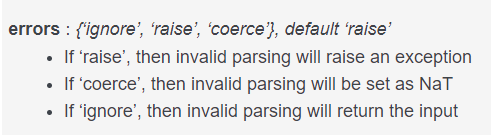

We can see that if we use errors='coerce', it will replace incompatible values will NaT (Not a Time).

In [50]:
demo['CrimeDateTime'] = pd.to_datetime(demo['CrimeDateTime'], errors='coerce')
demo['CrimeDateTime'].isna().sum()



1

**Make sure to drop or impute any null values for time. In this case we will just drop the one value.**

In [51]:
demo = demo.dropna(subset=['CrimeDateTime'])
demo.head()



CrimeDateTime          Description   District  Latitude  \
0 2022-07-09 09:30:00+00:00  ROBBERY - RESIDENCE  NORTHEAST   39.3223   
1 2022-07-09 16:00:00+00:00       COMMON ASSAULT   SOUTHERN   39.2821   
2 2022-07-09 00:34:28+00:00             SHOOTING  SOUTHWEST   39.2884   
3 2022-07-09 00:34:28+00:00             SHOOTING  SOUTHWEST   39.2884   
4 2022-07-09 18:00:00+00:00       COMMON ASSAULT  NORTHEAST   39.3188   

   Longitude  
0   -76.5467  
1   -76.6355  
2   -76.6569  
3   -76.6569  
4   -76.5872

In [52]:
pd.to_datetime(demo['CrimeDateTime'])



0        2022-07-09 09:30:00+00:00
1        2022-07-09 16:00:00+00:00
2        2022-07-09 00:34:28+00:00
3        2022-07-09 00:34:28+00:00
4        2022-07-09 18:00:00+00:00
                    ...           
527812   2013-07-31 17:45:00+00:00
527813   2013-07-31 14:15:00+00:00
527814   2013-07-31 21:00:00+00:00
527815   2013-07-31 17:00:00+00:00
527816   2013-07-31 11:40:00+00:00
Name: CrimeDateTime, Length: 527816, dtype: datetime64[ns, UTC]

As you can see, now we were able to convert our feature to a Pandas datetime.

**Summary**

While Pandas often is able to convert a feature to datetime without issues, this lesson explored a few solutions if you run into issues. First, if you encounter a unique format in your original dataset, you can "help" Pandas figure it out by including the format as an argument when converting it to datetime. If you receive an error due to one or a few data points, you can convert the error to a NaT value and drop it. As always, be sure to check your output along the way to ensure you are getting the results you expect. 

# Timedeltas & Date Ranges

## More Pandas Datetime Functions/Variable Types

- Pandas has other Objects for more advanced datetime functionality.
- See the Pandas user guide for the summary table of datetime objects, including:
    - Timedeltas: calculating a change in time.
    - date_ranges: creating equally spaced intervals

**Panda's Timedeltas**

- A time delta is a way to represent an increase or decrease in time. It is used primarily for calculating relative datetimes (e.g. "30 days before").
- Using pd.to_timedelta ([Documentation])(https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html):
    - The first Argument is the number of time steps (e.g. 30).
    - Unit: the unit of time (e.g. "D").
        - Possible values:
            - ‘W’
            - ‘D’ / ‘days’ / ‘day’,
            - ‘hours’ / ‘hour’ / ‘hr’ / ‘h’,
            - ‘m’ / ‘minute’ / ‘min’ / ‘minutes’ / ‘T’
            - ‘S’ / ‘seconds’ / ‘sec’ / ‘second’
            - ‘ms’ / ‘milliseconds’ / ‘millisecond’ / ‘milli’ / ‘millis’ / ‘L’
            - ‘us’ / ‘microseconds’ / ‘microsecond’ / ‘micro’ / ‘micros’ / ‘U’
            - ‘ns’ / ‘nanoseconds’ / ‘nano’ / ‘nanos’ / ‘nanosecond’ / ‘N’

We will return to our Delhi weather dataset and convert the 'date' feature to a datetime column.

In [53]:
import pandas as pd
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"
df = pd.read_csv(url)
df['datetime'] = pd.to_datetime(df['date'])


In [54]:
# Set datetime as index 

# set 'datetime' as the index
df = df.set_index('datetime')


In [55]:
# make the time delta of three days


delta_3d = pd.to_timedelta(3,'D')
delta_3d



Timedelta('3 days 00:00:00')

- Example Use:
    - For the most humid day in the weather data, what was the average wind speed over the 3 days prior and the 3 days after the most humid day?

In [56]:
max_date = df['humidity'].idxmax()
# calc 3 days BEFORE
pre_max = max_date - delta_3d
pre_max



Timestamp('2016-12-29 00:00:00')

In [57]:
# calc 3 days AFTER
post_max = max_date + delta_3d
post_max



Timestamp('2017-01-04 00:00:00')

Now that we have our pre and post dates, we can obtain average windspeed by setting those dates as the range and calculating the mean:

In [58]:
mean_windspeed = df.loc[pre_max:post_max,'wind_speed'].mean()
mean_windspeed



4.89791666675

**pd.date_range**

Another option is to store our range of dates as a variable using pd.date_range.

- pd.date_range Documentation

In [59]:
## making a date range to cover the pre-max to post-max window
date_range = pd.date_range(pre_max, post_max)
date_range



DatetimeIndex(['2016-12-29', '2016-12-30', '2016-12-31', '2017-01-01',
               '2017-01-02', '2017-01-03', '2017-01-04'],
              dtype='datetime64[ns]', freq='D')

Notice that we have a list of indices. When we attempt to run our calculation, we will get an error:

# Time Series Visualizations

We will continue to use the weather dataset from the previous lessons. Make sure you have changed the date to a datetime and set it as the index. (See previous lessons if needed)

- Let's focus on the average temperature for now ("meantemp")

In [61]:
ts = df['meantemp'].copy()
ts



datetime
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

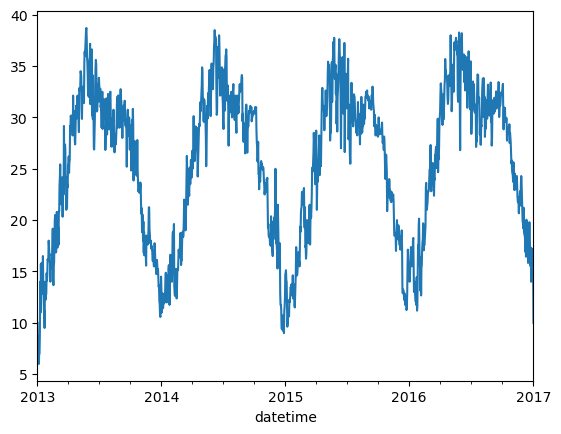

In [62]:
# plot of the mean temperature by date.

ax = ts.plot();



**Figure Sizes for Time Series**

- In general, when we are visualizing time series, we usually want a wider and shorter plot than we typically use.
- To see what is the default figsize used by matplotlib, we can check the values stored in the "rcParams" dictionary in pyplot.

In [65]:
# View default figsize

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']



[6.4, 4.8]

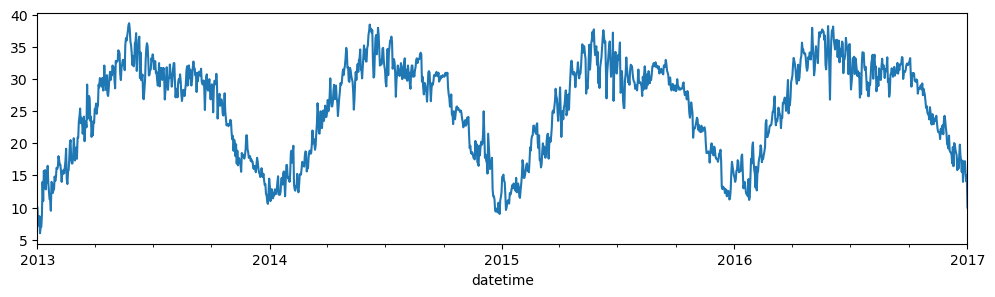

In [66]:
## plot a 12x3 figure
ts.plot(figsize=(12,3));



- That looks much better! It would be tedious to constantly have to set the figsize for every visualization, so we can actually change the default figsize using plt.rcParams!
- All we have to do is set the figure.figsize param equal to the new (Width,Height) we want as our default.


In [67]:
## setting the default figsize for this notebook
plt.rcParams['figure.figsize'] = (12,3)



**Plot - Style/ Level of Detail**

- If we just want to visualize the dates without the connecting lines, we can add style='.'

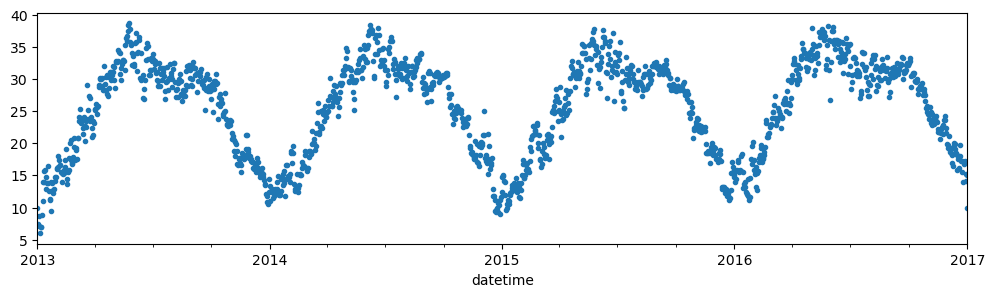

In [68]:
## we can also visualize just the markers without the line
ax = ts.plot(style='.');



- We can also keep our line, but ADD markers as well either by:

    - Using a "style" arg for .plot that includes a valid marker (".","o", etc.) AND a line style.
        - e.g. ".-" or "o--" or "<-" etc.
        - See the marker documentation for other marker styles
        - Valid line styles are "-","--",":"
    - Use the marker argument and specify a valid marker symbol (see link above).

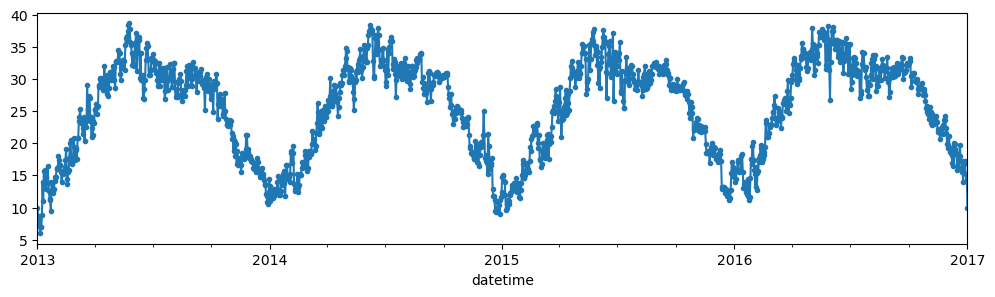

In [69]:
## Using style to add markers
ax = ts.plot(style='.-')



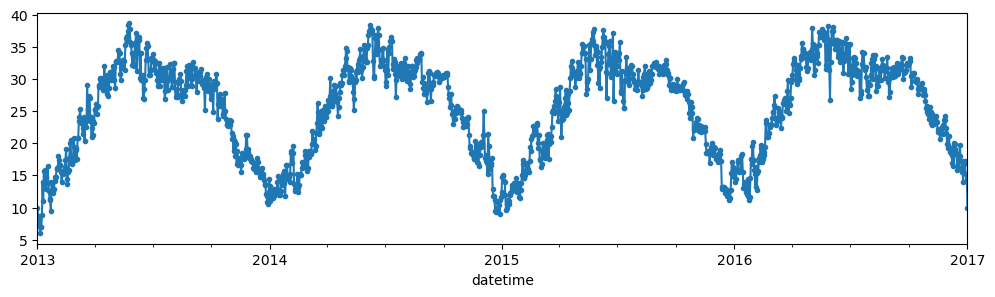

In [70]:
## Using marker to add markers
ax = ts.plot(marker='.')



**Formatting Date Xticks**

For more complex formatting, there are tools in matplotlib designed to allow us to customize the dates on our axis.

**Matplotlib's Artists**

There are special classes in base matplotlib (not in matplotlib.pyplot) that are designed to update the spacing and text formatting of our x and y ticks.

- Tick-Formatting Artists:
    - For general use cases, these artists are located in matplotlib's ticker submodule.
    - Dates, however, have their own submodule called dates

In [71]:
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates



- Each matplotlib axis can have both major and minor ticks.
- Matplotlib uses 2 types of artists to control ticks:
    - a Locator which determines WHERE the ticks appear
    - and a Formatter which determines the format of the tick label's text.
- The way we use these Artist objects is to:
    - Instantiate an appropriate Locator and/or Formatter
        - e.g.: locate_months = mdates.MonthLocator()
    - Apply your locator and/or formatter to the correct axis and types of ticks:
        - Start the line of code by slicing out the axis you want to customize from your Axis. (e.g. ax.xaxis or ax.yaxis)
        - Then chain on the "set_major_locator"/"set_major_formatter" to customize the major ticks. e.g. ax.xaxis.set_major_locator(locate_months).
- These formatters won't apply rotation or changes to the text alignment, so we will do that after updating our ticks using the ax.set_xticklabels() method.

We will demonstrate how these tools work.

In [72]:
## creating our tick locators and formatters
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
# create the formatter to display 3-letter month names + 2-digit year
fmt_months = mdates.DateFormatter("%B-%y")



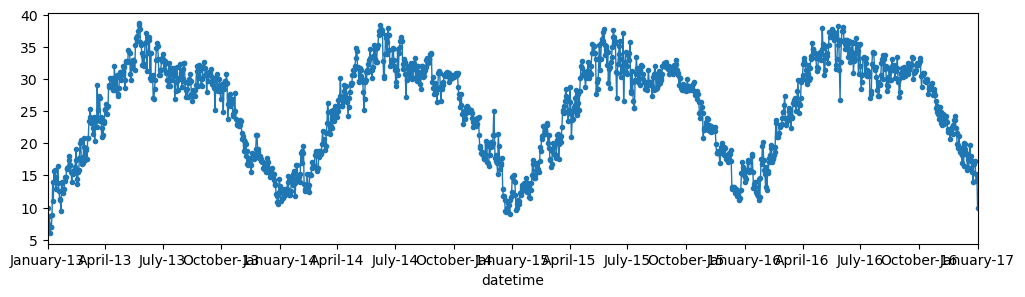

In [73]:
## Plot the time series with pandas
## Adding . markers and a thinner line
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)



Ok, this isn't quite what we wanted, but you can see we are moving in the correct direction! Stylizing visuals is an iterative process!

**Fixing Overlapping Labels**

- For simple date label formatting, we can take advantage of the matplotlib Figure method: fig.autofmt_xdate()
- However, this requires that we have the figure itself. When starting a visualization with Pandas, we only receive the Axis.
- Three ways to get the Figure:
    - Use ax.get_figure():
        - If you already have the axis.
    - Use plt.gcf() #get current figure:
        - If you do not have the axis and are running the cell that creates the figure.
    - Make the fig and ax first and then use fig, ax = plt.subplots() followed by ts.plot(ax=ax)

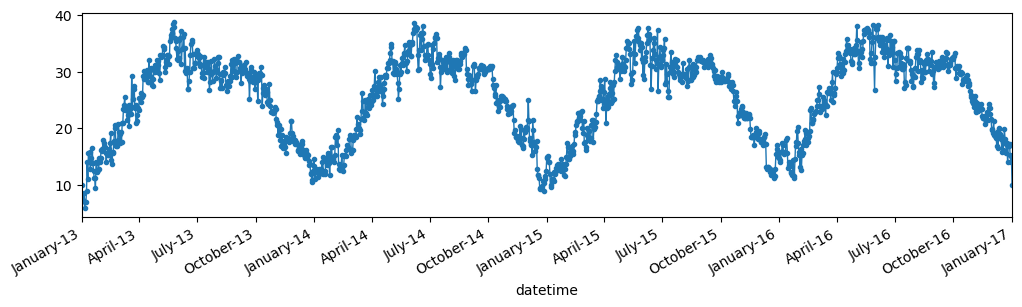

In [74]:
##  Plot the time series with pandas
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)
##  Using ax.get_figure()
fig = ax.get_figure()
fig.autofmt_xdate()



**Customizing Our Ticks (advanced)**

- The figure above now displays the month, but it's harder to visually see the years.
- To fix this, we will apply 2 locators/formatters:
    - One for the major ticks
    - One for the minor ticks
- For the figure above, we would like to:
    - Place minor ticks at every 3 months
    - Label minor ticks with 3-letter month names
    - Place major ticks at every year.
    - Label years with 4-digit years.
    - Make the grid lines for years darker than the grid lines for months.

In [75]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")



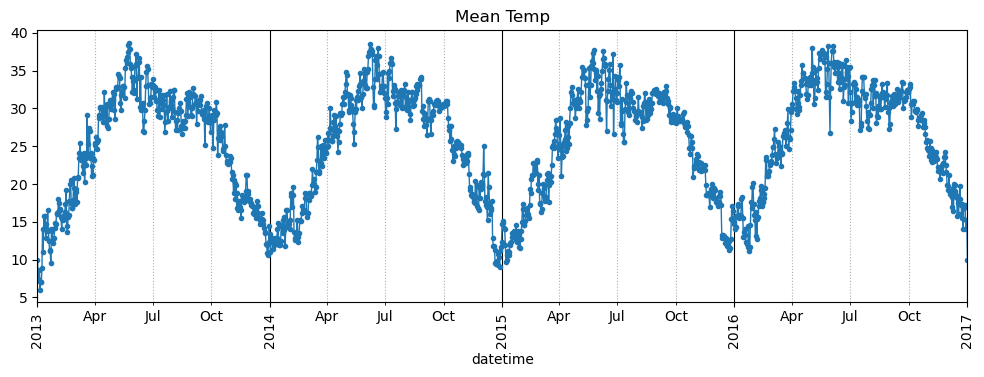

In [76]:
## Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp',marker='.',lw=1)
## customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
## customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')



### Some Additional Customizations

**Increasing Font Size of Major Tick Labels**

- Finally, we are going to change the formatting of our major xticklabels to use a large fontsize and bold fontweight.

C:\Users\admin\AppData\Local\Temp\ipykernel_13088\3330377280.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )


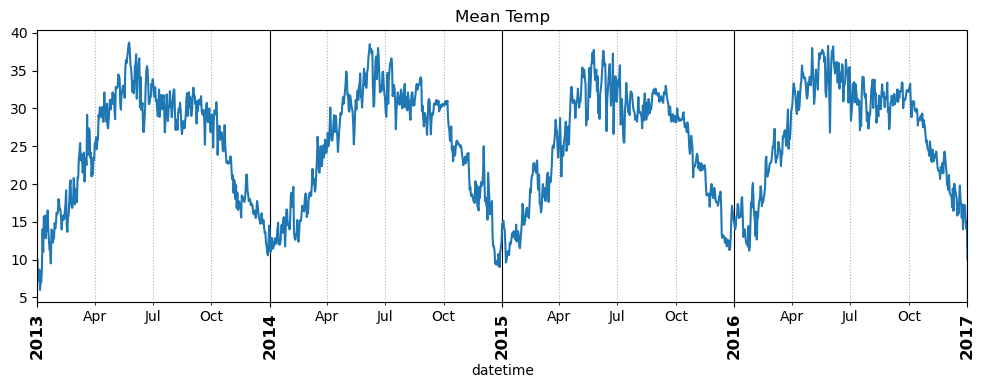

In [77]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp');
##  saving current xticks
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')



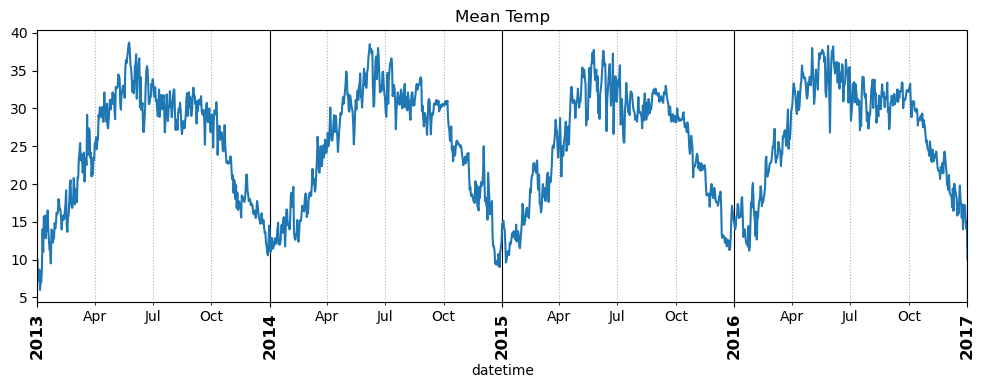

In [78]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp');
##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')



## Custom Function

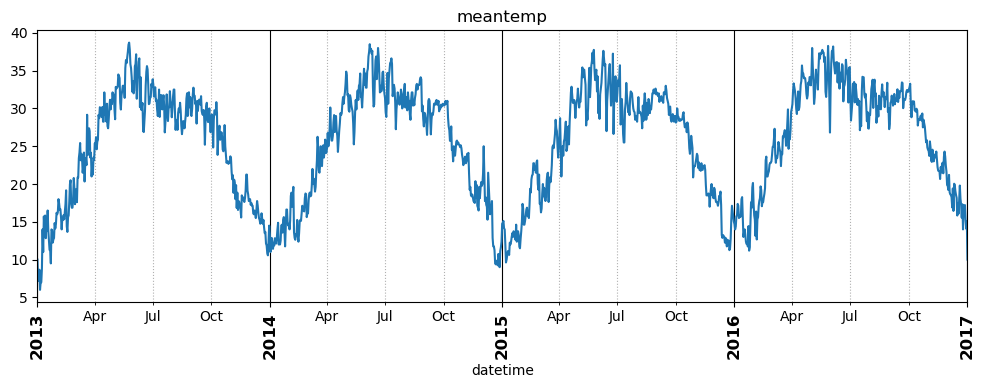

In [79]:
## we've done enough customization that it makes sense to bundle this in a function
def plot_dates(ts,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax
plot_dates(ts);



**Summary**

This lesson was all about creating professional, customized visuals for time series plots. Starting with simple modifications such as the figure size, we demonstrated how to change the style and how to leverage Matplotlibs Artists to locate and format ticks and labels. We showed some additional advanced techniques to further refine your visual. Finally, we demonstrated how to save these customizations within a function for future use. It can take some time and research to realize what options are even available to you. Playing around with the style of your visuals can be time-consuming, but creating a high-quality visual is worth the effort. 

# Overhauling Matplotlib Defaults


## Using seaborn's sns.set_context to simplify resizing text

- Overall, we have a nice visualization thus far. One major consideration for our final figure is the overall text size and readability.
- Instead of manually setting the font size and parameters for every piece of text on our figure (major/minor tick labels, xlabel/ylabel, title, etc.):
    - we can use seaborn's sns.set_context function!
- According to the documentation for the set_context function, it will:
    - "Set the parameters that control the scaling of plot elements. This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style."
- The function accepts the following parameters:
    - "context":
        - The scenario where your figure will viewed.
        - Options are:
            - "notebook"
            - "talk"
            - "paper"
            - "poster"
    - "font_scale":
        - a float that represents how much more to scale text
        - 1=default size, 2= double size, 0.5 = half size, etc.

## Temporarily using a context with sns.plotting_context

- If you only want to temporarily change the context settings, we can use sns.plotting_context (documentation).
    - We use the word "with" to temporarily apply the settings, just like when we temporarily opened local files.
- Example:
- We are going to first explore some options using the temporary sns.plotting_context. Once we have decided on our final format, we will use sns.set_context.

Note that this is using the custom function (plot_dates) we created in an earlier lesson!

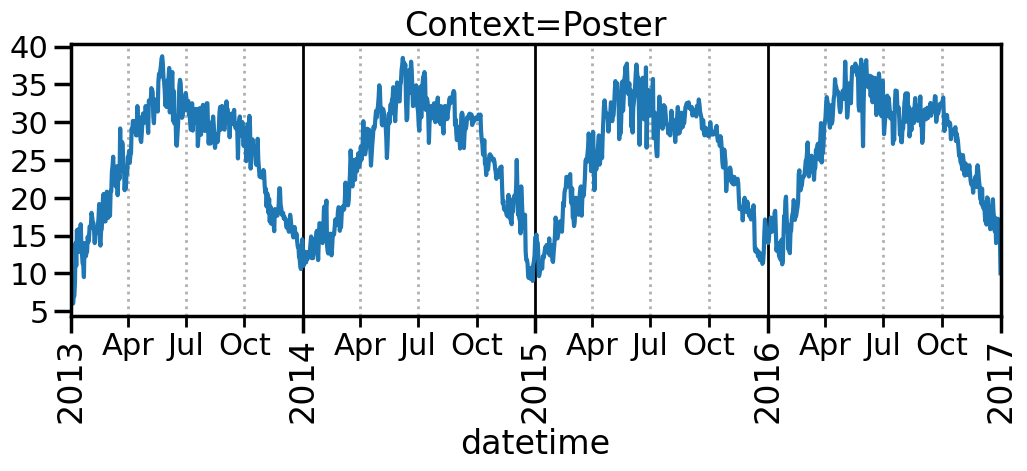

In [80]:
import seaborn as sns
with sns.plotting_context('poster'):    
    fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,title="Context=Poster")



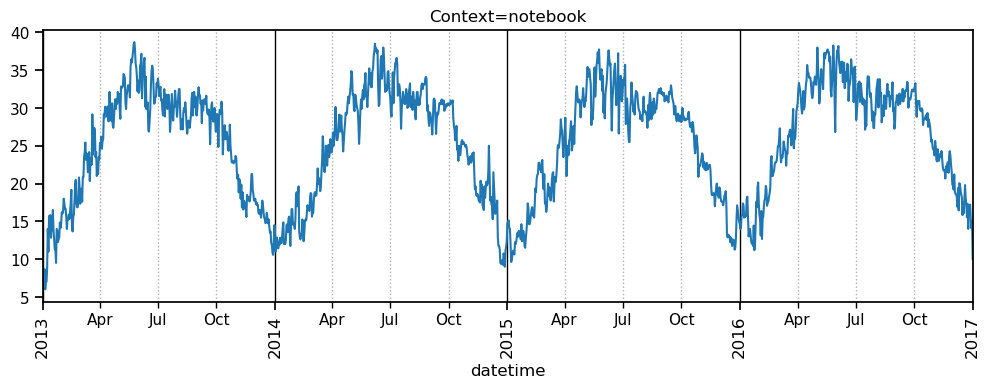

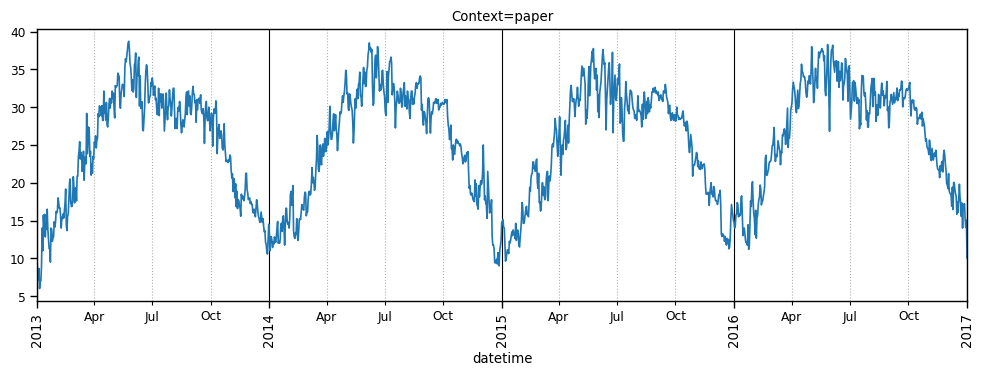

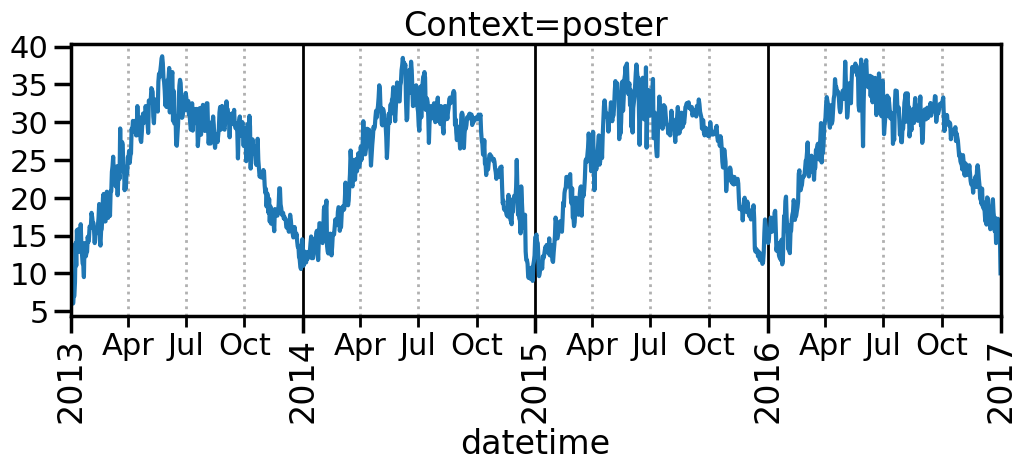

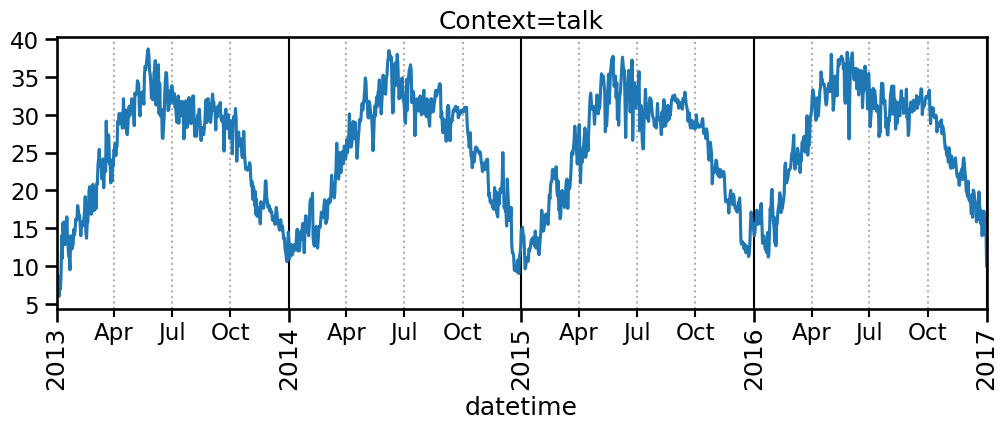

In [81]:
## temporarily changing context
for context in ['notebook','paper','poster','talk']:
    with sns.plotting_context(context):
        fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,
                            title=f"Context={context}")



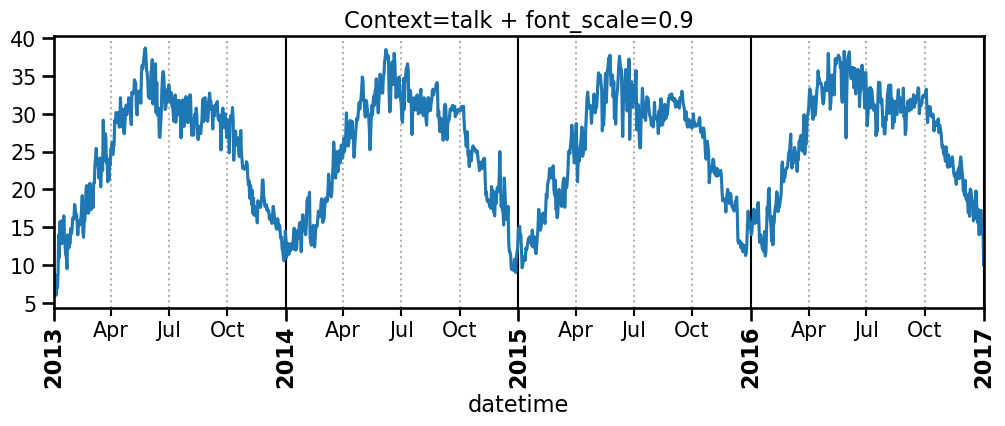

In [82]:
with sns.plotting_context("talk", font_scale=0.9):
    fig,ax = plot_dates(ts,xtick_fontsize=None,
                        xtick_fontweight="bold",
                        title=f"Context=talk + font_scale=0.9")



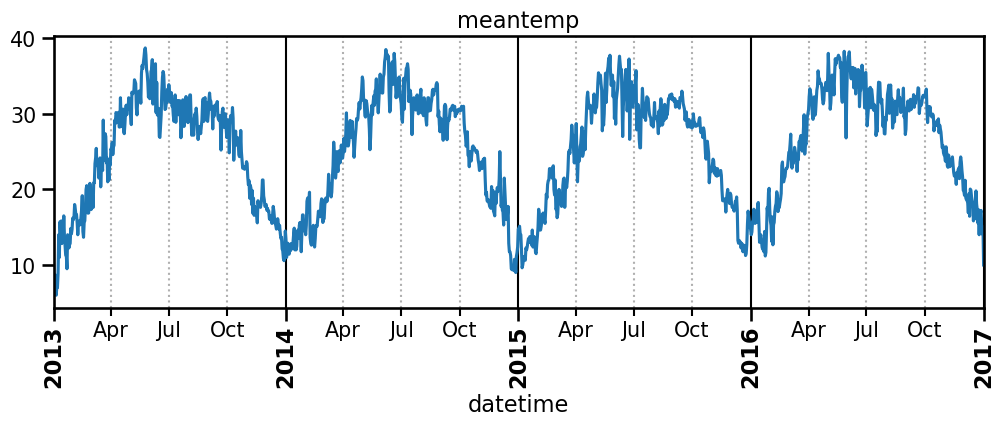

In [83]:
#  Set context if happy with this style

## making the settings permanent for the notebook:
sns.set_context("talk", font_scale=0.9)
fig,ax = plot_dates(ts,xtick_fontsize=None,
                    xtick_fontweight="bold")



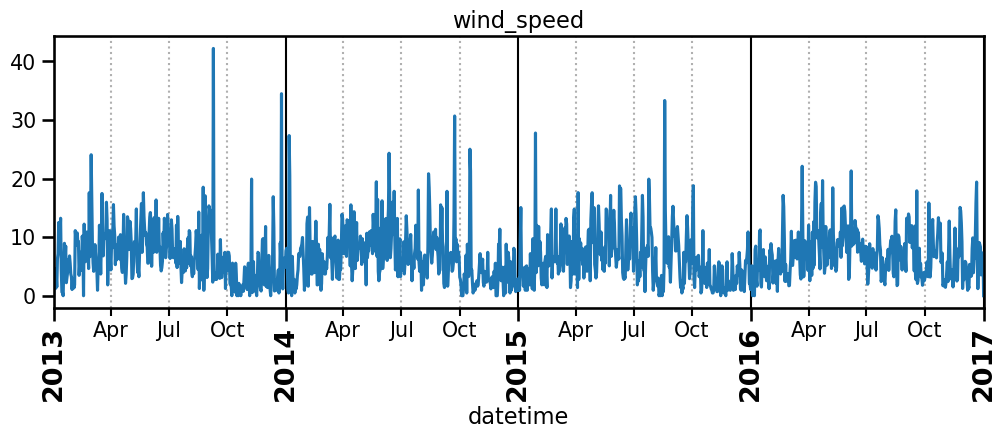

In [84]:
##  Visualize wind_speed instead of meantemp
ts = df['wind_speed'].copy()
plot_dates(ts);



- Notice how jagged our line for our time series is. The reason for this is that we seem to have values for every single DAY. But we are visualizing 4 full years of daily data!
- We can change the frequency of our time series and calculate aggregate measures (like the mean, sum, etc).

**Summary**

This lesson introduced Seaborn's context feature. We first temporarily explored the contexts and adjusted the relative font size. once we were satisfied with our selections, we set the context and font. 

# Resampling and Imputation

**Converting Time Series Frequencies - the Right Way**

- Let's revisit the weather dataset from the prior lesson, but let's select a different feature - wind_speed.

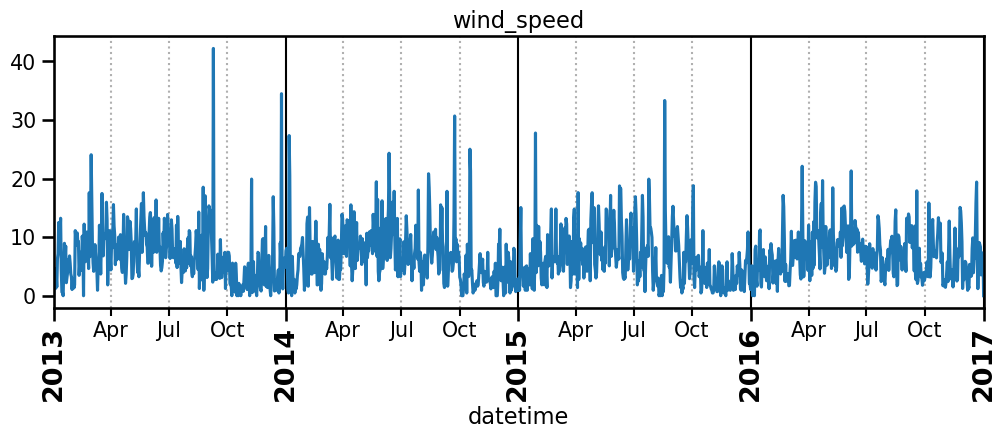

In [85]:
ts = df['wind_speed'].copy()
plot_dates(ts);


- Let's revisit the datetime index that we created in an earlier lesson.
- Let's check JUST the index itself so we can get some additional information.

In [86]:
ts.index



DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

- We can see in the display above that our index is indeed a DatetimeIndex (with a dtype of datetime64[ns]), but notice that it says "freq=None" in the last line of the output.
- Right now, we have a datetime index with a measurement for each day, but Panda's doesn't know that it should be automatically treated as a "daily" frequency time series.
- Once a time series has a frequency, it MUST have a value for every single time step in that frequency (so for every day if converting to daily, every hour if converting to hourly, etc.)

**Setting the Frequency**

- If the dates in the datetime index are already in the desired frequency, we can set the frequency using df.asfreq(CODE) where "CODE" is the correct frequency string code for pandas.
- For a complete list of pandas frequency codes, see the table in the "date offsets" section of the Times Series/Date functionality guide.


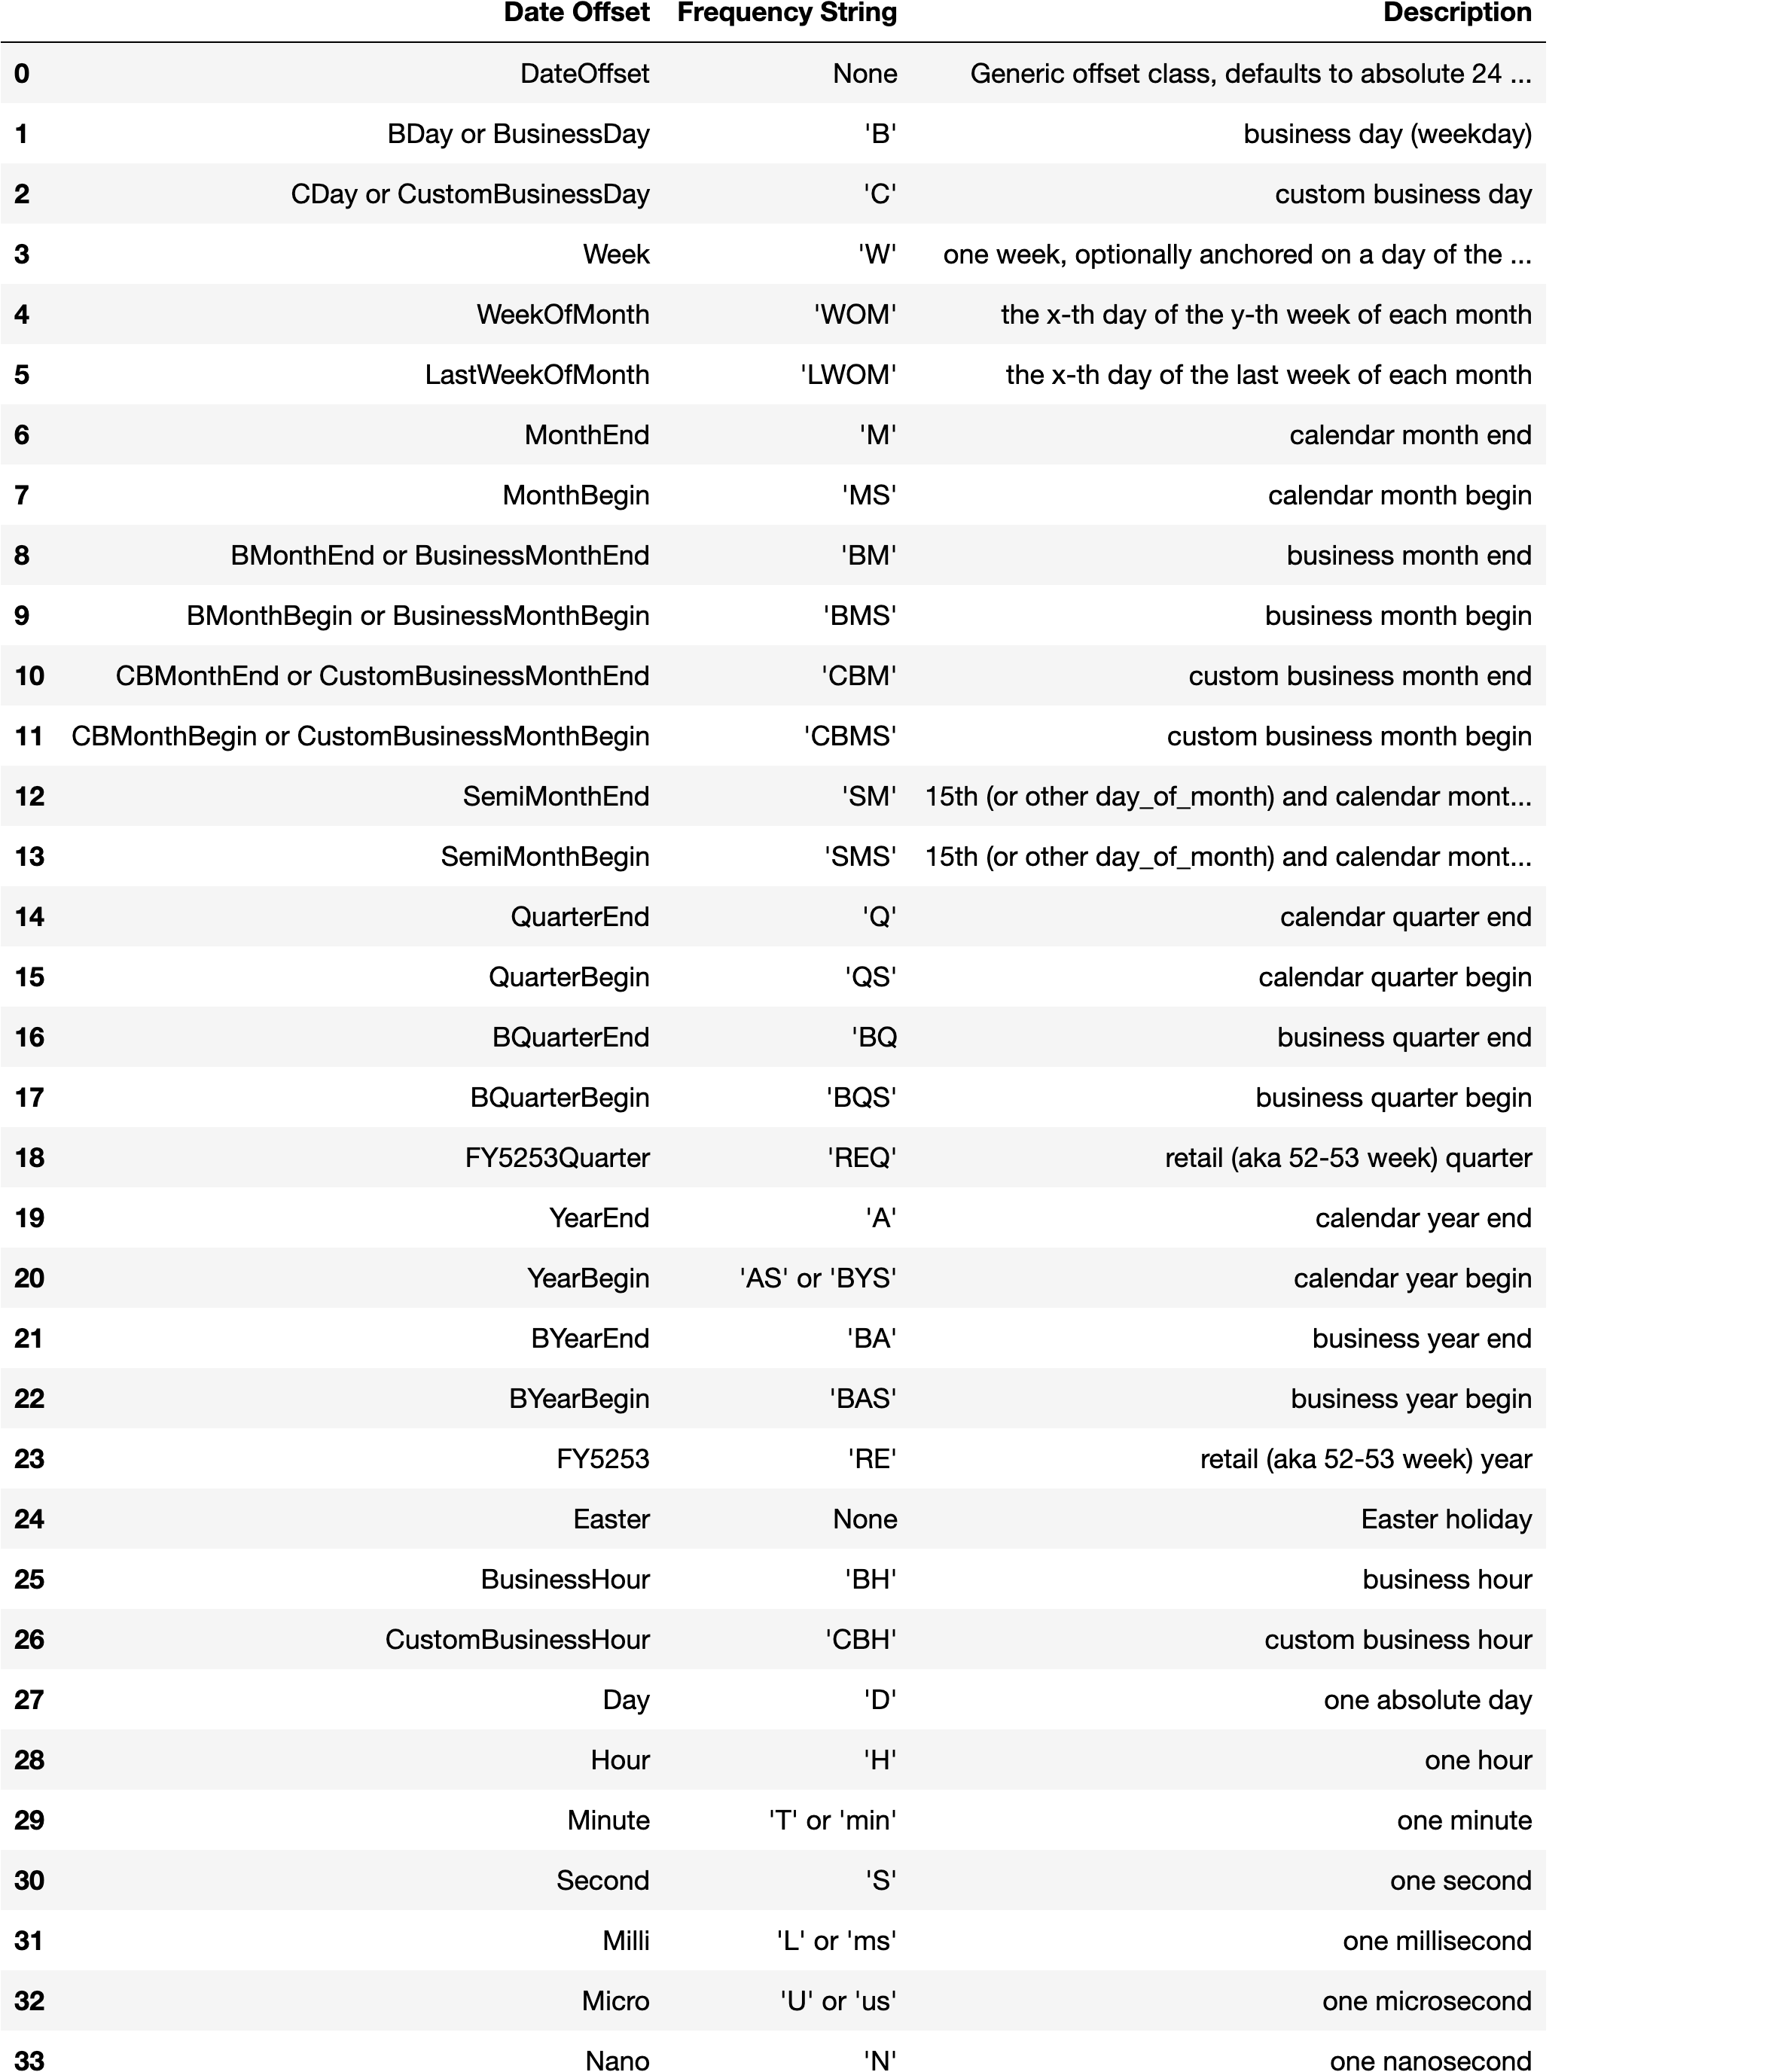

- Since our time series is already in daily format, we can use ts.asfreq("D") to set the frequency.

In [87]:
##  set daily frequency
ts = ts.asfreq('D')
##  preview the index again
ts.index



DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq='D')

- We can see that the frequency for our index is now "D" for daily. Great!
- But what if we tried to use a different frequency that did not match our data?
    - Let's try using the hourly frequency and see what happens:

First, let's go back to our original data.

In [88]:
#  remake ts
ts = df['wind_speed'].copy()
ts.index



DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

Now we will try applying the hourly frequency to the data. (remember that this data was collected daily). What do you think will happen when we set the frequency to hourly? Try it below to see if you predicted correctly!

In [89]:
##  try making daily data into an hourly frequency
ts_H = ts.asfreq("H")
ts_H



datetime
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    NaN
2013-01-01 02:00:00    NaN
2013-01-01 03:00:00    NaN
2013-01-01 04:00:00    NaN
                      ... 
2016-12-31 20:00:00    NaN
2016-12-31 21:00:00    NaN
2016-12-31 22:00:00    NaN
2016-12-31 23:00:00    NaN
2017-01-01 00:00:00    0.0
Freq: H, Name: wind_speed, Length: 35065, dtype: float64

- We can see that when we try to set the frequency to a more frequent one (e.g. daily to hourly. Monthly to daily, etc) it creates many null values. This makes sense because there is simply no data to correspond to that higher frequency.
    - Once we set a datetime frequency we MUST have rows for every single time step in that frequency.

But, could we set our frequency to a less frequent one (e.g. daily to weekly, or weekly to monthly, etc)? Here we should have all the data available. What do you think will happen?

- Let's try to convert our daily data to Monthly (MS) to include the first day of every month:

In [90]:
ts_MS = ts.asfreq("MS")
ts_MS.name = "asfreq"
ts_MS.head()



datetime
2013-01-01     0.000000
2013-02-01     2.220000
2013-03-01    24.066667
2013-04-01     4.400000
2013-05-01    12.685714
Freq: MS, Name: asfreq, dtype: float64

- It seemed to work! **BUT...it just removed every row that did not fall on the first of the month! That is a lot of data to just completely drop!**


For reference, here is the plot of our first-of-the-month data (where all other values were dropped)

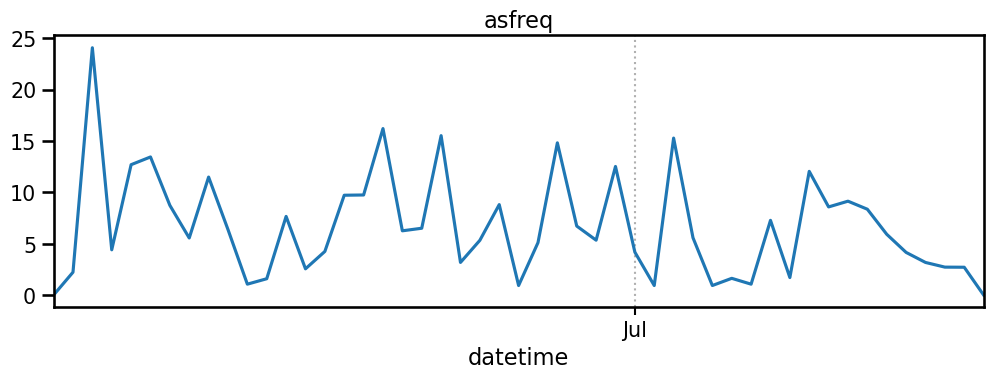

In [91]:
plot_dates(ts_MS);



There is another approach to changing datetime frequency that gives us the ability to aggregate the values that would otherwise just be deleted. We will explore this in the following section:

**Resampling (Upsampling/Downsampling)**

- df.resample() works similarly to df.groupby().
    - It prepares data to be aggregated, but it doesn't actually produce any data until we add an aggregation method.
       -  E.g. .mean(), .sum(),.min(), etc

There are two main ways to resample: Downsampling and Upsampling. You may recall learning these terms associated with addressing class imbalance. They apply to time series as well and are related to the direction of the frequency change.

- Downsampling reduces the sampling rate. For example, going from daily to monthly data.
- Upsampling increases the sampling rate. For example, going from daily to hourly data.


**Downsampling**

- Let's downsample our daily data to Month-Start frequency ("MS") and take the average monthly wind speed.

In [92]:
ts_MS_res = ts.resample("MS").mean()
ts_MS_res.name = 'Resampled'
ts_MS_res.head()



datetime
2013-01-01    4.833913
2013-02-01    7.474090
2013-03-01    8.757270
2013-04-01    8.046385
2013-05-01    8.943452
Freq: MS, Name: Resampled, dtype: float64

Notice that you have the same first-of-the-month dates, but the values associated with each are different than when we just reset the frequency above!

Side by Side comparison of output:

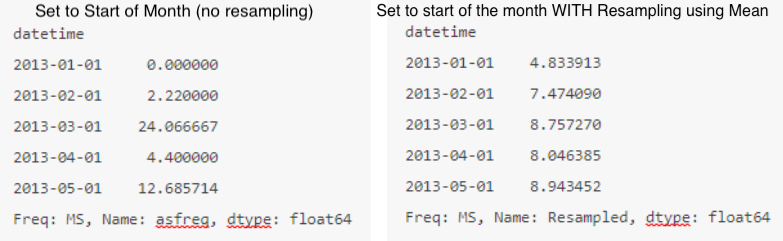

Notice that the values on the right are based on the resampling technique where the mean was used to aggregate the value. These are very different than simply taking the value that happened to occur on the first of the month. It is essential to be aware of what is happening to your data and understand these differences so you can choose the appropriate method for your use case.

To further highlight the difference, here is a plot of the non-resampled and resampled data:

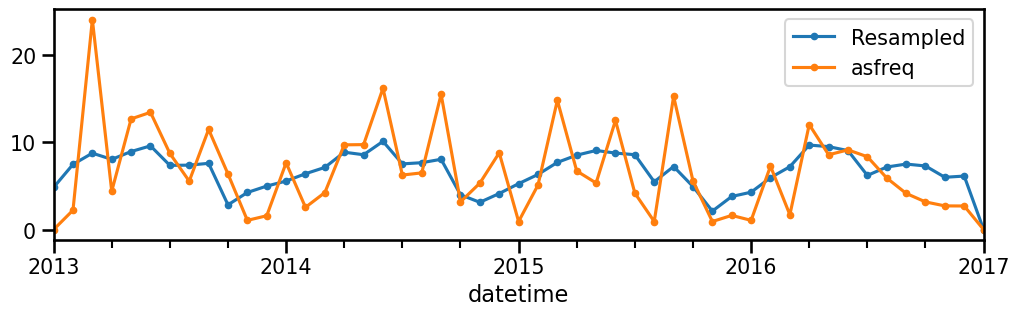

In [93]:
ax = ts_MS_res.plot(style='.-')
ts_MS.plot(style='.-',ax=ax)
ax.legend();


Wow... look at how different the asfreq vs .resample().mean() time series are! The asfreq one is way more jagged and is a less accurate summary of the wind speed during this time period.

**Use .agg() to Resample Time Series with Multiple Columns using Different Aggregation Methods**

- Revisiting the entire dataframe for aggregation.
- When working with an entire dataframe as time series, there are some additional complexities/considerations.
- For example, what if we wanted to get our daily data as week frequency BUT: for each feature, we want a different aggregation method?
- Specifically,
    - meantemp: mean
    - humidity: max
    - wind_speed: max
    - meanpressure: mean
- We can create a dictionary of each feature and the aggregation method we wish to apply to it. Then we ca use .agg() with resample and include our dictionary within the parentheses.

In [94]:
df_ts = df.drop(columns=['date'])
agg_dictionary = {'meantemp':'mean', 'humidity':'max', 'wind_speed':'max','meanpressure':'mean'}
df_W = df_ts.resample("W").agg(agg_dictionary)
df_W



meantemp    humidity  wind_speed  meanpressure
datetime                                                   
2013-01-06   7.705556   92.000000    4.633333   1017.300000
2013-01-13  12.343537   78.600000   13.228571   1016.632653
2013-01-20  13.642857   92.166667    8.950000   1017.139456
2013-01-27  12.329592   79.666667    6.800000   1020.337075
2013-02-03  15.736905   77.571429    3.700000   1017.020578
...               ...         ...         ...           ...
2016-12-04  20.428841   84.000000    9.185714    873.901783
2016-12-11  18.318229   82.833333    5.355556   1015.619483
2016-12-18  17.871140   64.541667    9.879167   1016.727185
2016-12-25  17.123006   94.300000   19.404762   1014.901237
2017-01-01  15.085173  100.000000    8.784211   1016.661017

[209 rows x 4 columns]

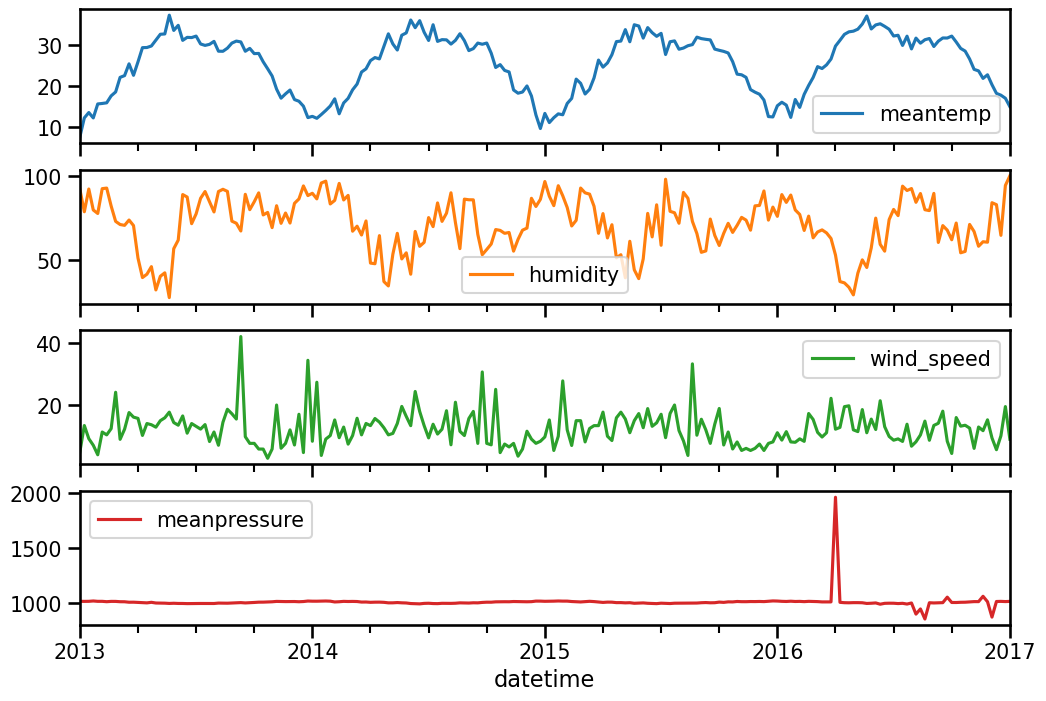

In [95]:
df_W.plot(figsize=(12,8),subplots=True);



**Upsampling**

Now we will return to looking at one feature (wind speed).

- Now let's try to resample our Daily data as an hourly (H) mean.

In [96]:
ts_H = ts.resample("H").mean()
ts_H.name = 'Resampled'
ts_H.head()



datetime
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    NaN
2013-01-01 02:00:00    NaN
2013-01-01 03:00:00    NaN
2013-01-01 04:00:00    NaN
Freq: H, Name: Resampled, dtype: float64

Recall that when we upsample, we are trying to add more data points...But the data is not available! 

<Axes: xlabel='datetime'>

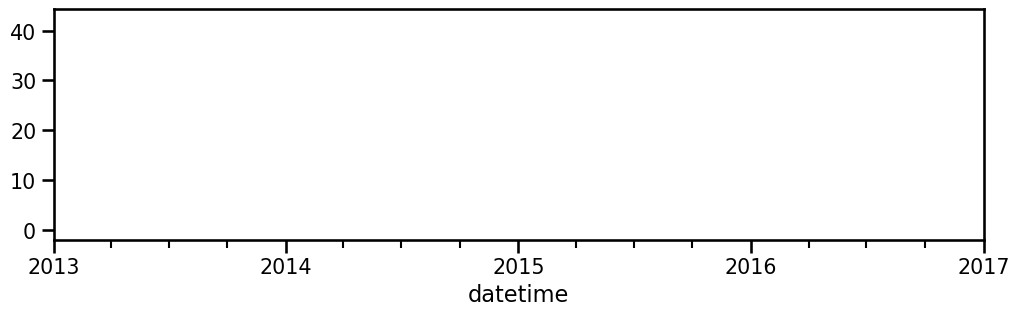

In [97]:
ts_H.plot()



- Note that there is nothing to see in the above graph! Just like we saw when we tried to use .asfreq to set the Daily data as Hourly, we created many null values in order to convert this time series to Hourly.
    - While there are ways to fill in the missing values, keep in mind that we only have 1 valid data point for every 24 rows (hours). Any method we choose is going to fill up 96% (23/24) of our rows with imputed values.
    - This is not acceptable nor appropriate and should be avoided.

**Handling Null Values**

A more realistic scenario for applying imputation strategies is when the time series data is ALMOST the full data needed for the frequency and only a small % of values are missing. We are going to intentionally create this situation from our wind speed data to demonstrate this concept. First, we will start with the complete data set.

In [98]:
ts = df['wind_speed'].copy()
ts



datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
                ...   
2016-12-28    3.547826
2016-12-29    6.000000
2016-12-30    6.266667
2016-12-31    7.325000
2017-01-01    0.000000
Name: wind_speed, Length: 1462, dtype: float64

In [99]:
#  Let's take a look at the data based on the days of the week:

day_of_week = ts.index.day_name()
day_of_week.value_counts()



datetime
Tuesday      209
Wednesday    209
Thursday     209
Friday       209
Saturday     209
Sunday       209
Monday       208
Name: count, dtype: int64

In [100]:
#   eliminate all of the weekend days (Saturday and Sunday) 
# to simulate the missing values.


##  removing all sundays and saturdays
ts = ts[ ~day_of_week.isin(['Sunday','Saturday']) ]
ts.index.day_name().value_counts()



datetime
Tuesday      209
Wednesday    209
Thursday     209
Friday       209
Monday       208
Name: count, dtype: int64

Notice that we have successfully removed the Saturdays and Sundays. We also do not have any missing values yet because we have not yet set a frequency.

Let's set the index to daily frequency and then review the options for imputing null values in time series.

- Since the rest of our rows are already daily, we can use .asfreq("D").

In [101]:
ts_D = ts.asfreq("D")
ts_D.head(10)



datetime
2013-01-01     0.000000
2013-01-02     2.980000
2013-01-03     4.633333
2013-01-04     1.233333
2013-01-05          NaN
2013-01-06          NaN
2013-01-07     6.300000
2013-01-08     7.142857
2013-01-09    12.500000
2013-01-10     7.400000
Freq: D, Name: wind_speed, dtype: float64

In [102]:
# Now, as intended, we have missing values in our data set.

ts_D.isna().sum()



416

In this case, we have 416 missing values, but this is a relatively small percentage of values, so we can consider imputation strategies. Remember, in this case, we have simulated that we do NOT actually have the data for the weekends for the sake of the demonstration.
Methods for Imputing Null Values with Time Series

Our options for filling null values with time series are different than our usual imputation methods. We wouldn't want to use the mean or median or most frequent values since those are calculated using the entire feature.

- Instead, we will explore the following options:
    - forward-filling: fill in null values using the last valid value that occurred PRIOR to the missing value.
    - back-filling: fill in null values with the next valid value that occurs AFTER the missing value.
    - interpolation: fill in null values by calculating the midpoint between the previous valid value and the next valid value.
- The first 2 options can be done by using ts.resample("D").fillna() and specifying the method argument:
    - "bfill"
    - "ffill"
- Interpolation can be applied by using the .interpolate() method after the .resample() instead of .fillna().

To help you visualize what is happening, we are going to work with just 1 week of our data set. We will slice out the first week here as our example:

In [103]:
##  saving 1 week of values to use for demonstration
example = ts_D.loc['2013-01-01':'2013-01-08']
example



datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05         NaN
2013-01-06         NaN
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64

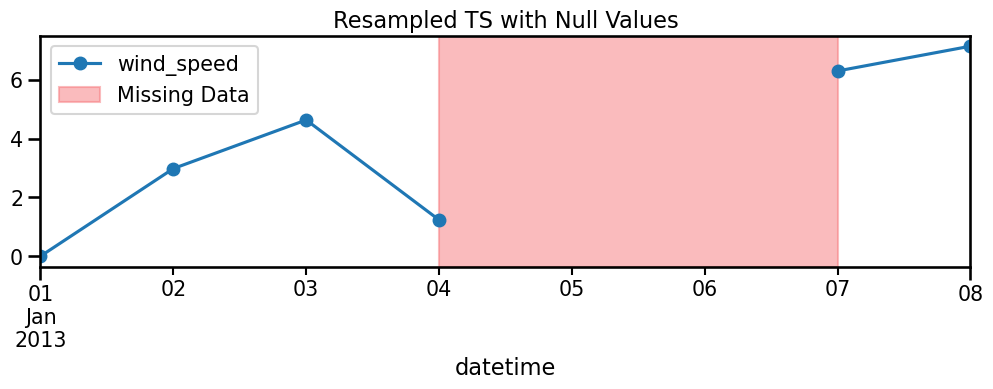

In [104]:
##  Plotting the missing data
ax = example.plot(style='o-', title='Resampled TS with Null Values',)
##  Annotating region with null values to impute
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();



**Forward-Fill**

Now we are going to apply the forward fill method. This will fill in the missing value with the preceding value. What do you think the graph will look like?

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    1.233333
2013-01-06    1.233333
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_13088\4040026305.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_ffill = example.fillna(method='ffill')


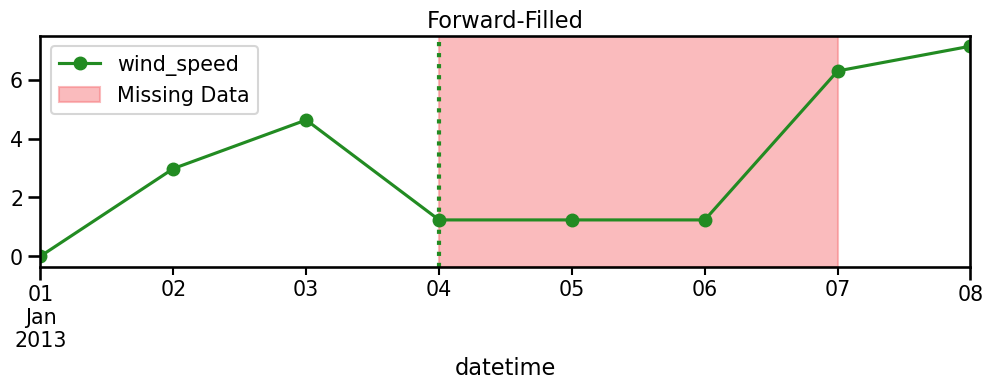

In [105]:
ts_ffill = example.fillna(method='ffill')
print(ts_ffill)
ax = ts_ffill.plot(style='o-',title='Forward-Filled', color='forestgreen');
ax.axvline('01-04-2013',color='forestgreen',lw=3, ls=':')
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();



- Is this what you expected? We can see that ffill took the value from Friday, 01/04/2013 (1.23333) and used that value to fill in the missing values for Saturday and Sunday.

Backward Fill

Now we will explore the backward fill method. It fills in the missing value with the next given value. What do you think the graph will look like when backfill is applied?

C:\Users\admin\AppData\Local\Temp\ipykernel_13088\3444452835.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_bfill = example.fillna(method='bfill')


datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    6.300000
2013-01-06    6.300000
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64


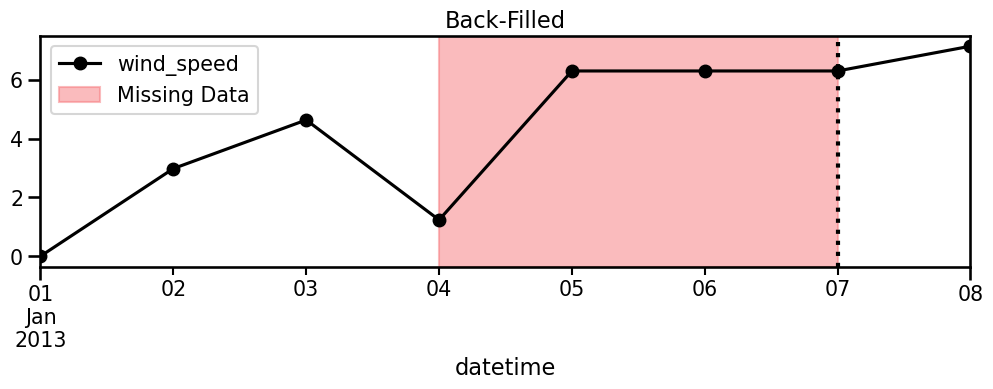

In [106]:
ts_bfill = example.fillna(method='bfill')
print(ts_bfill)
ax = ts_bfill.plot(style='o-',title='Back-Filled',color='k');
ax.axvline("01-07-2013",color='k',lw=3, ls=':')
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();



 We can see that bfill took the value from the following Monday (6.30000) and filled that in for the missing values for Saturday and Sunday.


**Interpolate**

If we use .interpolate(), pandas will calculate values that would fall between the previous valid value and the next valid value. Notice here that we have two missing values in a row. How do you think interpolate will approach this? Let's run the code to find out!

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    2.922222
2013-01-06    4.611111
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64


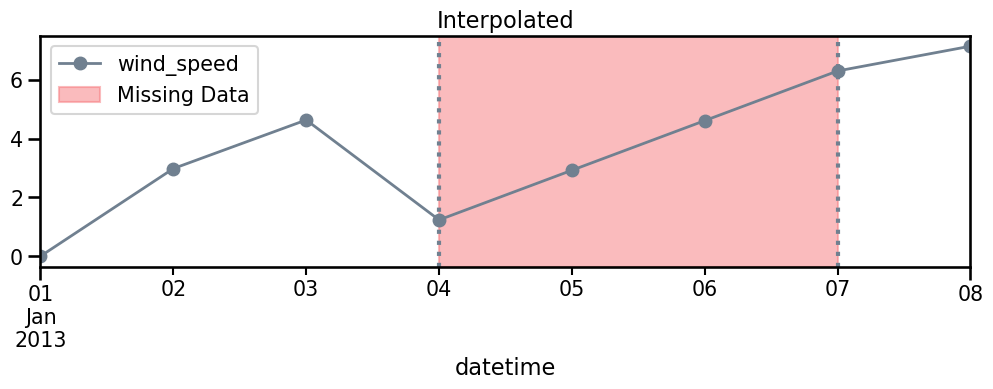

In [107]:
ts_interp = example.interpolate()
print(ts_interp)
ax = ts_interp.plot(style='o-', color='slategray', lw=2,title='Interpolated');
##  annotating start and end values used by interpolate
ax.axvline('01-04-2013', color='slategray',ls=':',lw=3)
ax.axvline('01-07-2013', color='slategray',ls=':',lw=3)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();



 As we can see above, instead of filling 01/05 and 01/06 with the 1.23 from Friday or 6.3 from Monday, it calculated values that fell in between those values: 2.9 and 4.6. Note too, how it handled the two missing values in a row! It did not just average the start and end dates, but it calculated the appropriate distance to fill in two points in a row.


**Comparison of Imputation Methods**

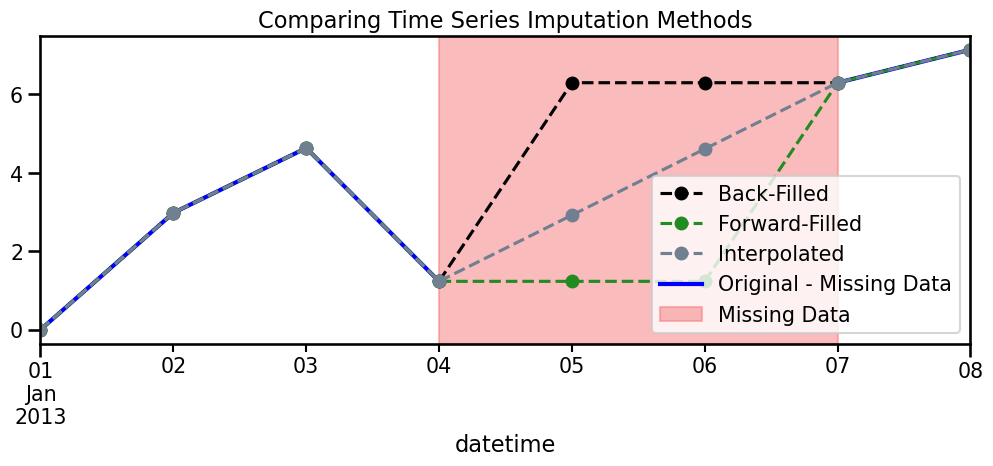

In [108]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Comparing Time Series Imputation Methods')
ts_bfill.plot(style='o--',label='Back-Filled',ax=ax, color='k');
ts_ffill.plot(style='o--',label='Forward-Filled',ax=ax, color='forestgreen');
ts_interp.plot(style='o--',label='Interpolated', ax=ax,color='slategray' );
example.plot(style='-', label='Original - Missing Data',ax=ax, color='blue',             lw=3,zorder=-1)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d',            alpha=0.5, zorder=0, label='Missing Data')
ax.legend();



**Moving the legend outside the plot**

- When using ax.legend(), you can give it the anchor point for the top-right corner of the plot by using the bbox_to_anchor argument and providing 2-number coordinates.
    - Coordinates: from 0 to 1 representing where 0 is the very left/bottom corner of the figure and 1 is the very top right

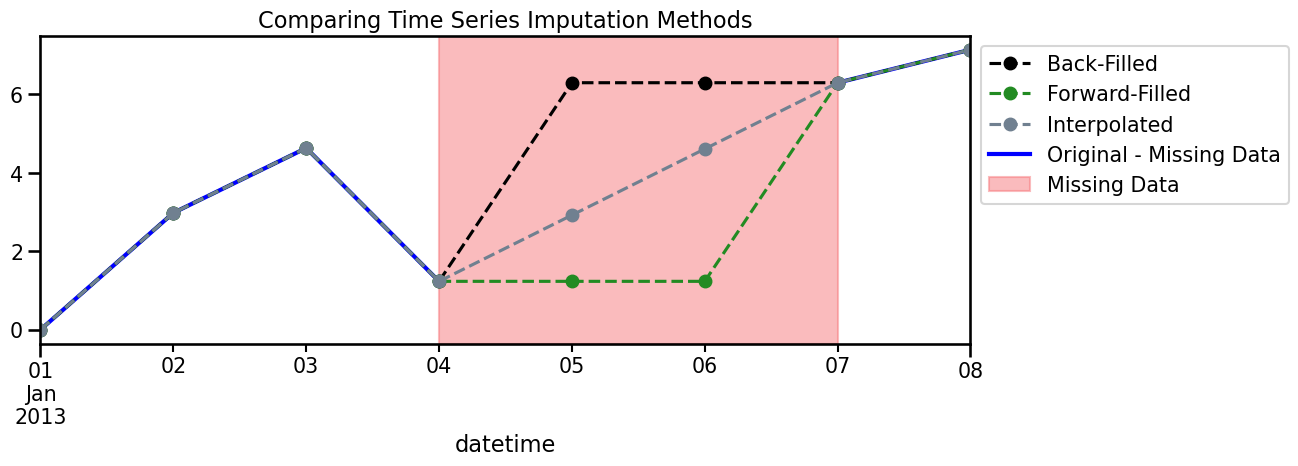

In [109]:
# move legend to outside of plot on right side
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Comparing Time Series Imputation Methods')
ts_bfill.plot(style='o--',label='Back-Filled',ax=ax, color='k');
ts_ffill.plot(style='o--',label='Forward-Filled',ax=ax, color='forestgreen');
ts_interp.plot(style='o--',label='Interpolated', ax=ax,color='slategray' );
example.plot(style='-', label='Original - Missing Data',ax=ax, color='blue', lw=3,zorder=-1)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend(bbox_to_anchor=[1,1]);


**Which imputation method should I choose?**

First, note that all of the methods here assume that the values close to the missing value are similar (which may or may not be the case). There are also many advanced techniques for imputations, some of which we will discuss in a future lesson after exploring statistics with time series. In general, interpolating is a good method to start with unless you have reason to believe a forward or back fill method would be a better representation of your missing values.


**Summary**

This lesson shows how time series can be resampled to change the frequency. When downsampling, we can use aggregate methods to more thoroughly represent the data. We can also create a dictionary to apply different aggregate methods to each feature. When setting a frequency, we must have a value for every point in that frequency, so upsampling may not be feasible if there are many missing values. However, if there are a reasonable amount of missing values, we are able to impute missing values for time series. We explored backfilling, forward filling, and interpolation techniques.




#  Pandas DataReader

## What is Pandas DataReader?

Pandas DataReader is a Python package that allows us to access data sources from the internet and automatically create dataframes with the information. It is commonly used with financial data. Some common sources include:

- Yahoo Finance
- Google Finance
- World Bank

Each source uses a slightly different format. The lesson below with demonstrate how to access data from Yahoo Finance. We will first define a start and end date. We will use Jan 1, 2001, as our start date and today's date as our end date. Note that the end date will vary depending on today's date.

In [110]:
import datetime as dt
##  saving today as string for pandas DataReader
today = dt.datetime.now().strftime("%Y-%m-%d")
today



'2023-09-25'

In [111]:
start_date = '2001-01-01'
end_date = today



First, we will obtain information about Microsoft stocks from Yahoo:

In [113]:
# in a notebook, use ! before a pip command 
!pip install yfinance



In [114]:
import yfinance as yfin
yfin.pdr_override()


In [115]:
import pandas_datareader.data as pdr


In [116]:
msft = pdr.get_data_yahoo('MSFT',start_date, end_date)
msft


[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2001-01-02   22.062500   22.500000   21.437500   21.687500   13.472749   
2001-01-03   21.593750   24.437500   21.562500   23.968750   14.889928   
2001-01-04   23.906250   25.250000   23.437500   24.218750   15.045218   
2001-01-05   24.250000   24.937500   23.781250   24.562500   15.258768   
2001-01-08   24.468750   24.875000   23.343750   24.468750   15.200528   
...                ...         ...         ...         ...         ...   
2023-09-18  327.799988  330.399994  326.359985  329.059998  329.059998   
2023-09-19  326.170013  329.390015  324.510010  328.649994  328.649994   
2023-09-20  329.510010  329.589996  320.510010  320.769989  320.769989   
2023-09-21  319.260010  325.350006  315.000000  319.529999  319.529999   
2023-09-22  321.320007  321.450012  316.149994  317.010010  317.010010   

               Volume  
Date                   
2001-01-02   82413200  
2001-01-03  135962200  
2001-01-04  112397000  
2001-01-05   93414600  
2001-01-08   79817600  
...               ...  
2023-09-18   16834200  
2023-09-19   16505900  
2023-09-20   21436500  
2023-09-21   35529500  
2023-09-22   21429700  

[5717 rows x 6 columns]

In [117]:
# !pip install yfinance
import yfinance as yfin
yfin.pdr_override()
##  Pandas DataReader Import
import pandas_datareader.data as pdr
# example use with new function
msft = pdr.get_data_yahoo('MSFT',start_date, end_date)


[*********************100%***********************]  1 of 1 completed


In [118]:
##  Get GOOGL price for 2012-2020 from Yahoo Finance
googl = pdr.get_data_yahoo('GOOGL',start_date, end_date)
googl 


[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-19    2.502503    2.604104    2.401401    2.511011    2.511011   
2004-08-20    2.527778    2.729730    2.515015    2.710460    2.710460   
2004-08-23    2.771522    2.839840    2.728979    2.737738    2.737738   
2004-08-24    2.783784    2.792793    2.591842    2.624374    2.624374   
2004-08-25    2.626627    2.702703    2.599600    2.652653    2.652653   
...                ...         ...         ...         ...         ...   
2023-09-18  136.610001  139.160004  136.610001  138.210007  138.210007   
2023-09-19  137.419998  138.410004  136.619995  138.039993  138.039993   
2023-09-20  138.080002  138.080002  133.619995  133.740005  133.740005   
2023-09-21  131.440002  132.229996  130.070007  130.440002  130.440002   
2023-09-22  130.759995  132.029999  129.600006  130.250000  130.250000   

               Volume  
Date                   
2004-08-19  893181924  
2004-08-20  456686856  
2004-08-23  365122512  
2004-08-24  304946748  
2004-08-25  183772044  
...               ...  
2023-09-18   21861300  
2023-09-19   20353700  
2023-09-20   29927500  
2023-09-21   31488700  
2023-09-22   26385200  

[4807 rows x 6 columns]

In [119]:
##  Get AAPL stock price for 2012-2020 from Yahoo Finance
apple = pdr.get_data_yahoo('AAPL',start_date, end_date)
apple


[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2001-01-02    0.265625    0.272321    0.260045    0.265625    0.225462   
2001-01-03    0.258929    0.297991    0.257813    0.292411    0.248198   
2001-01-04    0.323940    0.330357    0.300223    0.304688    0.258618   
2001-01-05    0.302455    0.310268    0.286830    0.292411    0.248198   
2001-01-08    0.302455    0.303292    0.284598    0.295759    0.251039   
...                ...         ...         ...         ...         ...   
2023-09-18  176.479996  179.380005  176.169998  177.970001  177.970001   
2023-09-19  177.520004  179.630005  177.130005  179.070007  179.070007   
2023-09-20  179.259995  179.699997  175.399994  175.490005  175.490005   
2023-09-21  174.550003  176.300003  173.860001  173.929993  173.929993   
2023-09-22  174.669998  177.080002  174.050003  174.789993  174.789993   

               Volume  
Date                   
2001-01-02  452312000  
2001-01-03  817073600  
2001-01-04  739396000  
2001-01-05  412356000  
2001-01-08  373699200  
...               ...  
2023-09-18   67257600  
2023-09-19   51826900  
2023-09-20   58436200  
2023-09-21   63047900  
2023-09-22   56663000  

[5717 rows x 6 columns]

- Let's make a DataFrame with the Adjusted Close for Google, Microsoft, and Apple.

In [120]:
stocks_df = pd.DataFrame({"AAPL": apple['Adj Close'],
             "MSFT": msft['Adj Close'],
             'GOOGL': googl['Adj Close']})
stocks_df



AAPL        MSFT       GOOGL
Date                                          
2001-01-02    0.225462   13.472760         NaN
2001-01-03    0.248198   14.889920         NaN
2001-01-04    0.258618   15.045219         NaN
2001-01-05    0.248198   15.258773         NaN
2001-01-08    0.251039   15.200531         NaN
...                ...         ...         ...
2023-09-18  177.970001  329.059998  138.210007
2023-09-19  179.070007  328.649994  138.039993
2023-09-20  175.490005  320.769989  133.740005
2023-09-21  173.929993  319.529999  130.440002
2023-09-22  174.789993  317.010010  130.250000

[5717 rows x 3 columns]

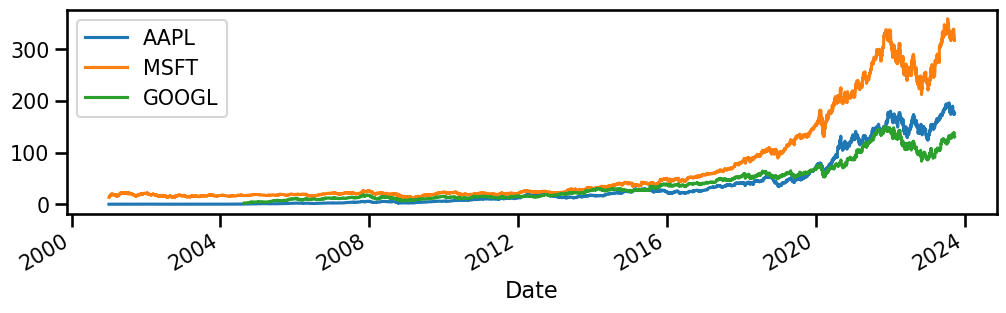

In [121]:
stocks_df.plot();



## Downloading Crypto Currencies

Let's take a look at some crypto values:

In [125]:
pip install pandas_datareader --upgrade


Note: you may need to restart the kernel to use updated packages.


In [126]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

# Define the start and end dates
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 9, 1)

# Fetch Bitcoin data
bitcoin = pdr.DataReader('BTC-USD', 'yahoo', start_date, end_date)

# Fetch Ethereum data
ethereum = pdr.DataReader('ETH-USD', 'yahoo', start_date, end_date)

# Create a DataFrame with adjusted close prices
crypto_df = pd.DataFrame({'BTC': bitcoin['Adj Close'],
                          'ETH': ethereum['Adj Close']})

# Display the DataFrame
print(crypto_df)



TypeError: string indices must be integers

In [127]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

# Define the start and end dates
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 9, 1)

try:
    # Fetch Bitcoin data
    bitcoin = pdr.DataReader('BTC-USD', 'yahoo', start_date, end_date)
except Exception as e:
    print(f"Error fetching Bitcoin data: {e}")

try:
    # Fetch Ethereum data
    ethereum = pdr.DataReader('ETH-USD', 'yahoo', start_date, end_date)
except Exception as e:
    print(f"Error fetching Ethereum data: {e}")

# Create a DataFrame with adjusted close prices
crypto_df = pd.DataFrame({'BTC': bitcoin['Adj Close'],
                          'ETH': ethereum['Adj Close']})

# Display the DataFrame
print(crypto_df)


Error fetching Bitcoin data: string indices must be integers
Error fetching Ethereum data: string indices must be integers


NameError: name 'bitcoin' is not defined

In [129]:
crypto_df.plot();



NameError: name 'crypto_df' is not defined

https://dev.to/shahstavan/how-to-fetch-stock-data-using-api-in-python-5e15

https://dev.to/shahstavan/how-to-fetch-stock-data-using-api-in-python-5e15

# Preparing Wide Form Time Data

- Recognize wide-form vs long-form dataframes.
- Use panda's melt function to convert wide form to long form.
- Navigate a MultiIndex
- Combine groupby and resample to process time series in a group-wise manner

In [130]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)



In [131]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)


In [132]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax



**Wide vs Long-Form Data**

- Thus far with pandas, we have been using dataframes that have already been formatted where the ROWS are the time steps. This is called Long-Form.
- It is very common to receive time series data where each COLUMN is a time step. This is "Wide-Form" data.
- Below we will walk through converting covid19 data from wide-form to long-form using pd.melt


**Corona Virus Time Series - Cases**

The data set below is an example of a "Wide-Form" data set from the Novel Covid-19 Kaggle Data Set.

In [133]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRtZ3XGbdzViSOsO6Gam4LQAQTSrFMXSAz_CIcBmmQYBv9uuggbGcxUuqXtMeUPiHR9NyI6At3apf5d/pub?output=csv"
df = pd.read_csv(url)
df



Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
280            NaN    West Bank and Gaza  31.952200   35.233200        0   
281            NaN  Winter Olympics 2022  39.904200  116.407400        0   
282            NaN                 Yemen  15.552727   48.516388        0   
283            NaN                Zambia -13.133897   27.849332        0   
284            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/23/22  6/24/22  \
0          0        0        0        0        0  ...   181987   182033   
1          0        0        0        0        0  ...   278211   278504   
2          0        0        0        0        0  ...   266015   266025   
3          0        0        0        0        0  ...    43774    43774   
4          0        0        0        0        0  ...    99761    99761   
..       ...      ...      ...      ...      ...  ...      ...      ...   
280        0        0        0        0        0  ...   658503   658503   
281        0        0        0        0        0  ...      535      535   
282        0        0        0        0        0  ...    11824    11824   
283        0        0        0        0        0  ...   324922   325110   
284        0        0        0        0        0  ...   255136   255309   

     6/25/22  6/26/22  6/27/22  6/28/22  6/29/22  6/30/22  7/1/22  7/2/22  
0     182072   182149   182228   182324   182403   182528  182594  182643  
1     278793   279077   279077   279167   280298   280851  281470  282141  
2     266030   266038   266049   266062   266073   266087  266105  266115  
3      43774    43774    43774    43774    43774    43774   44177   44177  
4      99761    99761    99761   101320   101320   101320  101320  101320  
..       ...      ...      ...      ...      ...      ...     ...     ...  
280   658503   658503   659853   659853   659853   659853  659853  659853  
281      535      535      535      535      535      535     535     535  
282    11824    11824    11824    11824    11824    11824   11824   11824  
283   325110   325110   325348   325498   325498   325857  325857  325857  
284   255309   255355   255383   255383   255520   255586  255586  255586  

[285 rows x 897 columns]

- We can see that we have many countries in this dataset, each with its own row and that we have a separate column for each day in the dataset.
- We need to convert this to long-form before we are able to use it as a time series with pandas.
- Note also, that the values given for each date are the cumulative number of confirmed cases of covid.

**pd.melt**

- Pandas has a function called pd.melt which is designed to turn wide-form data into long-form, but to let us keep some id columns intact. Its easier to understand once demonstrated.
- The columns we want to keep associated with each timestamp will be our id_vars.
    - If we want EVERY other column to be converted to rows, that's all we need!
    - If we wanted only SOME columns converted to rows, we would use the value_vars argument.

Let's take a look at the existing columns:

In [134]:
df.columns



Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/23/22', '6/24/22', '6/25/22', '6/26/22', '6/27/22', '6/28/22',
       '6/29/22', '6/30/22', '7/1/22', '7/2/22'],
      dtype='object', length=897)

We want to keep several columns including the Province/State, Country/Region, Lat, and Long. We will include these in our list of id_vars. What do you think the result will be when we use the pd.melt function?

In [135]:
melted = pd.melt(df,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'] )
melted



Province/State        Country/Region        Lat        Long variable  \
0                 NaN           Afghanistan  33.939110   67.709953  1/22/20   
1                 NaN               Albania  41.153300   20.168300  1/22/20   
2                 NaN               Algeria  28.033900    1.659600  1/22/20   
3                 NaN               Andorra  42.506300    1.521800  1/22/20   
4                 NaN                Angola -11.202700   17.873900  1/22/20   
...               ...                   ...        ...         ...      ...   
254500            NaN    West Bank and Gaza  31.952200   35.233200   7/2/22   
254501            NaN  Winter Olympics 2022  39.904200  116.407400   7/2/22   
254502            NaN                 Yemen  15.552727   48.516388   7/2/22   
254503            NaN                Zambia -13.133897   27.849332   7/2/22   
254504            NaN              Zimbabwe -19.015438   29.154857   7/2/22   

         value  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
254500  659853  
254501     535  
254502   11824  
254503  325857  
254504  255586  

[254505 rows x 6 columns]

**Is this the result you expected?**

Notice how all of the previous date columns have now been compressed into rows. Do you see the new column that includes the date? It is titled "variable". The corresponding original value in that column is in the "value" column. Take some time to compare the original df with the melted df to ensure you understand the transformation!

- We can also provide the names we want to use for these 2 new columns. Since these values are confirmed cases of Covid, we will name this column "Confirmed".
- To simplify our output, we also decided to drop the "Lat" and "Long" values here.

In [136]:
melted = pd.melt(df.drop(columns=['Lat','Long']),
                 id_vars=['Province/State', 'Country/Region'],
                value_name='Confirmed',var_name="Date")
melted



Province/State        Country/Region     Date  Confirmed
0                 NaN           Afghanistan  1/22/20          0
1                 NaN               Albania  1/22/20          0
2                 NaN               Algeria  1/22/20          0
3                 NaN               Andorra  1/22/20          0
4                 NaN                Angola  1/22/20          0
...               ...                   ...      ...        ...
254500            NaN    West Bank and Gaza   7/2/22     659853
254501            NaN  Winter Olympics 2022   7/2/22        535
254502            NaN                 Yemen   7/2/22      11824
254503            NaN                Zambia   7/2/22     325857
254504            NaN              Zimbabwe   7/2/22     255586

[254505 rows x 4 columns]


- Now that we have our melted dataframe, we can slice out the countries of interest and begin preparing our datetime index. 

First, we will convert the 'Date' column values to datetime objects. 

In [137]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254505 entries, 0 to 254504
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  79477 non-null   object        
 1   Country/Region  254505 non-null  object        
 2   Date            254505 non-null  datetime64[ns]
 3   Confirmed       254505 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.8+ MB


C:\Users\admin\AppData\Local\Temp\ipykernel_13088\98810087.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted['Date'] = pd.to_datetime(melted['Date'])


Notice that in this dataset, we have the same dates repeated many times, one for each country in the dataset.

We will need to set Date as our index, but we will NOT resample just yet

In [138]:
melted = melted.set_index("Date")
melted



Province/State        Country/Region  Confirmed
Date                                                      
2020-01-22            NaN           Afghanistan          0
2020-01-22            NaN               Albania          0
2020-01-22            NaN               Algeria          0
2020-01-22            NaN               Andorra          0
2020-01-22            NaN                Angola          0
...                   ...                   ...        ...
2022-07-02            NaN    West Bank and Gaza     659853
2022-07-02            NaN  Winter Olympics 2022        535
2022-07-02            NaN                 Yemen      11824
2022-07-02            NaN                Zambia     325857
2022-07-02            NaN              Zimbabwe     255586

[254505 rows x 3 columns]

**What do you think will happen if we resample the data at this point?
Let's give it a try and inspect the results.**

In [139]:
# take a look at what happens when we resample
melted.resample("D").sum()



Province/State  \
Date                                                            
2020-01-22  Australian Capital TerritoryNew South WalesNor...   
2020-01-23  Australian Capital TerritoryNew South WalesNor...   
2020-01-24  Australian Capital TerritoryNew South WalesNor...   
2020-01-25  Australian Capital TerritoryNew South WalesNor...   
2020-01-26  Australian Capital TerritoryNew South WalesNor...   
...                                                       ...   
2022-06-28  Australian Capital TerritoryNew South WalesNor...   
2022-06-29  Australian Capital TerritoryNew South WalesNor...   
2022-06-30  Australian Capital TerritoryNew South WalesNor...   
2022-07-01  Australian Capital TerritoryNew South WalesNor...   
2022-07-02  Australian Capital TerritoryNew South WalesNor...   

                                               Country/Region  Confirmed  
Date                                                                      
2020-01-22  AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...        557  
2020-01-23  AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...        657  
2020-01-24  AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...        944  
2020-01-25  AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...       1437  
2020-01-26  AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...       2120  
...                                                       ...        ...  
2022-06-28  AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...  545535742  
2022-06-29  AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...  546470126  
2022-06-30  AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...  547500950  
2022-07-01  AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...  548474889  
2022-07-02  AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...  548826605  

[893 rows x 3 columns]

We now have the sum of all cases for each day, BUT what information have we lost? We did have data broken down by country, but when we resampled, all the data for each day were combined into a single result. We will explore how can we resample while maintaining the original granularity of our data in the next section.

## 2. Combining .groupby and .resample for groupwise- time series processing

Our data is broken down by country. Let's take a look at how many countries are included.

In [140]:
## There are 199 unique countries included
melted['Country/Region'].nunique()



199

We can combine a groupby by for Country/Region with a .resample("D") to resample the data in a group-wise manner.

- The only caveat/complexity that this introduces is that we will now have 2 columns for our index: a MultiIndex
- Note that when we use .resample, we must include a method to aggregate. Since we only have one value per day per country, you may have thought .asfreq() would work, but this will not work with groupby. It does not make a difference which aggregation method we use because the mathematical result is the same. For example, we could aggregate by using .last(), .first(), or .mean(). We used .sum() in the code below. Try the other methods to confirm they give the same results!

In [141]:
df_ts = melted.groupby('Country/Region').resample("D").sum()
df_ts



Province/State Country/Region  Confirmed
Country/Region Date                                               
Afghanistan    2020-01-22              0    Afghanistan          0
               2020-01-23              0    Afghanistan          0
               2020-01-24              0    Afghanistan          0
               2020-01-25              0    Afghanistan          0
               2020-01-26              0    Afghanistan          0
...                                  ...            ...        ...
Zimbabwe       2022-06-28              0       Zimbabwe     255383
               2022-06-29              0       Zimbabwe     255520
               2022-06-30              0       Zimbabwe     255586
               2022-07-01              0       Zimbabwe     255586
               2022-07-02              0       Zimbabwe     255586

[177707 rows x 3 columns]

In [142]:
df_ts.head().index



MultiIndex([('Afghanistan', '2020-01-22'),
            ('Afghanistan', '2020-01-23'),
            ('Afghanistan', '2020-01-24'),
            ('Afghanistan', '2020-01-25'),
            ('Afghanistan', '2020-01-26')],
           names=['Country/Region', 'Date'])

Notice, though, that we have maintained our ability to locate information for particular countries!

In [143]:
df_ts.loc['Afghanistan']



Province/State Country/Region  Confirmed
Date                                               
2020-01-22              0    Afghanistan          0
2020-01-23              0    Afghanistan          0
2020-01-24              0    Afghanistan          0
2020-01-25              0    Afghanistan          0
2020-01-26              0    Afghanistan          0
...                   ...            ...        ...
2022-06-28              0    Afghanistan     182324
2022-06-29              0    Afghanistan     182403
2022-06-30              0    Afghanistan     182528
2022-07-01              0    Afghanistan     182594
2022-07-02              0    Afghanistan     182643

[893 rows x 3 columns]


Filtering by Date with a MultiIndex using pd.IndexSlice

While we can easily filter by country, we now have altered how we must filter by date.

Let's say we wanted to limit our data to just the year 2020. If you try the method that we would use with a single index, you will get an error. 


         This will not work with our multiIndex
         df_ts.loc['2020']


Instead, we can use pd.IndexSlice with .loc to filter for all values in 2020.

In [144]:
df_ts.loc[pd.IndexSlice[:, '2020'],:]



Province/State Country/Region  Confirmed
Country/Region Date                                               
Afghanistan    2020-01-22              0    Afghanistan          0
               2020-01-23              0    Afghanistan          0
               2020-01-24              0    Afghanistan          0
               2020-01-25              0    Afghanistan          0
               2020-01-26              0    Afghanistan          0
...                                  ...            ...        ...
Zimbabwe       2020-12-27              0       Zimbabwe      13077
               2020-12-28              0       Zimbabwe      13148
               2020-12-29              0       Zimbabwe      13325
               2020-12-30              0       Zimbabwe      13625
               2020-12-31              0       Zimbabwe      13867

[68655 rows x 3 columns]

We can also filter by both date and country. For example, if we just want the countries from Afghanistan to Algeria (alphabetically) and the data for 2020:

In [145]:
df_ts.loc[pd.IndexSlice['Afghanistan':'Algeria','2020'],:]



Province/State Country/Region  Confirmed
Country/Region Date                                               
Afghanistan    2020-01-22              0    Afghanistan          0
               2020-01-23              0    Afghanistan          0
               2020-01-24              0    Afghanistan          0
               2020-01-25              0    Afghanistan          0
               2020-01-26              0    Afghanistan          0
...                                  ...            ...        ...
Algeria        2020-12-27              0        Algeria      98249
               2020-12-28              0        Algeria      98631
               2020-12-29              0        Algeria      98988
               2020-12-30              0        Algeria      99311
               2020-12-31              0        Algeria      99610

[1035 rows x 3 columns]

## Plotting with a MultiIndex

    Let's go ahead and visualize the time series data! Specifically, let's plot the number of Confirmed Cases for several countries in North America (US, Mexico, Canada).

In [146]:
countries = ['Canada','Mexico','US']
plot_df = df_ts.loc[countries].copy()
plot_df


Province/State  \
Country/Region Date                                                            
Canada         2020-01-22  AlbertaBritish ColumbiaDiamond PrincessGrand P...   
               2020-01-23  AlbertaBritish ColumbiaDiamond PrincessGrand P...   
               2020-01-24  AlbertaBritish ColumbiaDiamond PrincessGrand P...   
               2020-01-25  AlbertaBritish ColumbiaDiamond PrincessGrand P...   
               2020-01-26  AlbertaBritish ColumbiaDiamond PrincessGrand P...   
...                                                                      ...   
US             2022-06-28                                                  0   
               2022-06-29                                                  0   
               2022-06-30                                                  0   
               2022-07-01                                                  0   
               2022-07-02                                                  0   

                                                              Country/Region  \
Country/Region Date                                                            
Canada         2020-01-22  CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...   
               2020-01-23  CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...   
               2020-01-24  CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...   
               2020-01-25  CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...   
               2020-01-26  CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...   
...                                                                      ...   
US             2022-06-28                                                 US   
               2022-06-29                                                 US   
               2022-06-30                                                 US   
               2022-07-01                                                 US   
               2022-07-02                                                 US   

                           Confirmed  
Country/Region Date                   
Canada         2020-01-22          0  
               2020-01-23          2  
               2020-01-24          3  
               2020-01-25          3  
               2020-01-26          3  
...                              ...  
US             2022-06-28   87296327  
               2022-06-29   87490815  
               2022-06-30   87627486  
               2022-07-01   87821971  
               2022-07-02   87838623  

[2679 rows x 3 columns]

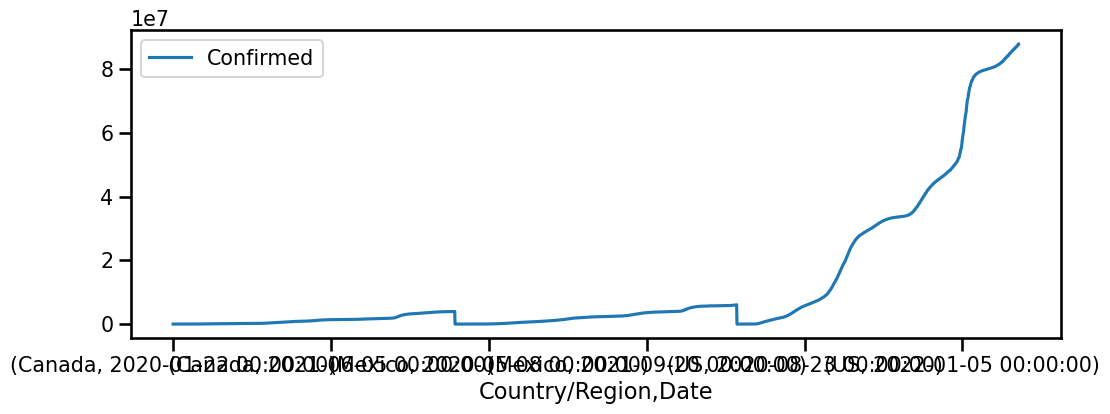

In [147]:
plot_df.plot(figsize=(12,4));



Oh, no! What happened?!

- When we have a multi-index, creating visualizations becomes more complex. Pandas is confused about what should be considered a group, and it has lumped all of the data together into 1 line.
- In order to visualize each country as a separate line, we will have to modify our multi-index (temporarily). We need Pandas to consider each country as its own separate column so that we get a line for each country.
    - To do so, we can leverage the .unstack() method.

## Using unstack() for Plotting with a MultiIndex


**Understanding Index Levels**

- Right now, we have a multi-index with 2 levels.
    - Level 0 (the outer-most index on the left): Country
    - Level 1 (the next/inner index): Date
- To demonstrate, let's use the df.index.get_level_values() function to get the values from 1 index at a time.

In [148]:
# level 0 is Country/Region
plot_df.index.get_level_values(0)



Index(['Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada',
       ...
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US'],
      dtype='object', name='Country/Region', length=2679)

In [149]:
# level 1 is Date
plot_df.index.get_level_values(1)



DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-02'],
              dtype='datetime64[ns]', name='Date', length=2679, freq=None)

- According to the Pandas documentation for .unstack(), it will "pivot a level of the (necessarily hierarchical) index labels."
- So .unstack() will allow us to pivot our data in a way that we can keep our Date as the index and convert our outer index (Country/Region) into columns, which is exactly what we need.

https://pandas.pydata.org/pandas-docs/version/1.4/reference/api/pandas.DataFrame.unstack.html

## Applying unstack() for Our Visualization

- Unstack accepts a "level" argument for which level of our multi-index should be converted into columns.
- Since we want the outermost index (level 0) to become the columns, we will need to specify level=0.

In [150]:
unstacked = plot_df.unstack(level=0)
unstacked



Province/State            \
Country/Region                                             Canada Mexico US   
Date                                                                          
2020-01-22      AlbertaBritish ColumbiaDiamond PrincessGrand P...      0  0   
2020-01-23      AlbertaBritish ColumbiaDiamond PrincessGrand P...      0  0   
2020-01-24      AlbertaBritish ColumbiaDiamond PrincessGrand P...      0  0   
2020-01-25      AlbertaBritish ColumbiaDiamond PrincessGrand P...      0  0   
2020-01-26      AlbertaBritish ColumbiaDiamond PrincessGrand P...      0  0   
...                                                           ...    ... ..   
2022-06-28      AlbertaBritish ColumbiaDiamond PrincessGrand P...      0  0   
2022-06-29      AlbertaBritish ColumbiaDiamond PrincessGrand P...      0  0   
2022-06-30      AlbertaBritish ColumbiaDiamond PrincessGrand P...      0  0   
2022-07-01      AlbertaBritish ColumbiaDiamond PrincessGrand P...      0  0   
2022-07-02      AlbertaBritish ColumbiaDiamond PrincessGrand P...      0  0   

                                                   Country/Region              \
Country/Region                                             Canada  Mexico  US   
Date                                                                            
2020-01-22      CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...  Mexico  US   
2020-01-23      CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...  Mexico  US   
2020-01-24      CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...  Mexico  US   
2020-01-25      CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...  Mexico  US   
2020-01-26      CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...  Mexico  US   
...                                                           ...     ...  ..   
2022-06-28      CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...  Mexico  US   
2022-06-29      CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...  Mexico  US   
2022-06-30      CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...  Mexico  US   
2022-07-01      CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...  Mexico  US   
2022-07-02      CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...  Mexico  US   

               Confirmed                     
Country/Region    Canada   Mexico        US  
Date                                         
2020-01-22             0        0         1  
2020-01-23             2        0         1  
2020-01-24             3        0         2  
2020-01-25             3        0         2  
2020-01-26             3        0         5  
...                  ...      ...       ...  
2022-06-28       3945493  5986917  87296327  
2022-06-29       3948112  5986917  87490815  
2022-06-30       3954275  6034602  87627486  
2022-07-01       3955704  6058689  87821971  
2022-07-02       3956897  6058689  87838623  

[893 rows x 9 columns]

- Now that we have our DataFrame unstacked, we have a separate column for each country.

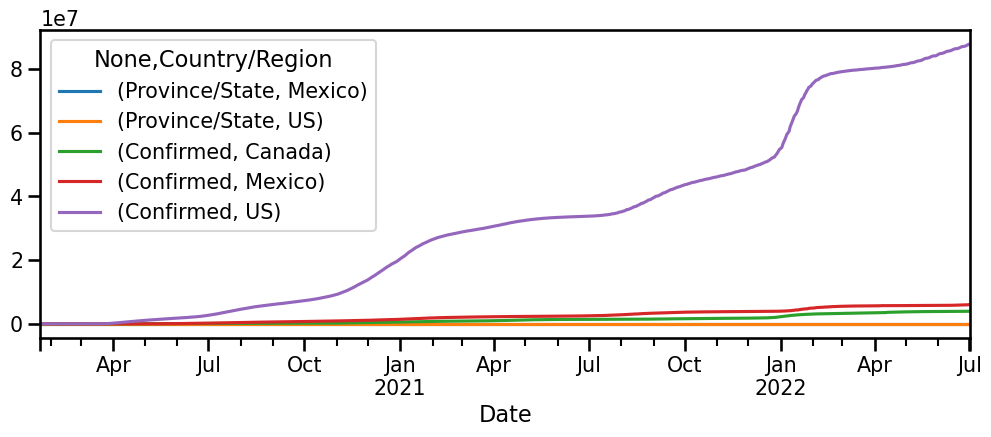

In [151]:
ax = unstacked.plot()



- And there we go! We were able to plot each country as a separate line.
- The one remaining issue is our legend.
    - Why do we now have (Confirmed, CountryName) for all of the countries?
- If we take a look at the columns of our unstacked dataframe, we will see that we have now created a MultiIndex.

In [152]:
unstacked.columns



MultiIndex([('Province/State', 'Canada'),
            ('Province/State', 'Mexico'),
            ('Province/State',     'US'),
            ('Country/Region', 'Canada'),
            ('Country/Region', 'Mexico'),
            ('Country/Region',     'US'),
            (     'Confirmed', 'Canada'),
            (     'Confirmed', 'Mexico'),
            (     'Confirmed',     'US')],
           names=[None, 'Country/Region'])

- By slicing out the "Confirmed" column from our multi-index before we plot, we will have bypassed the outer level of our MultiIndex, so we will not see the "Confirmed" column name appear in our legend.

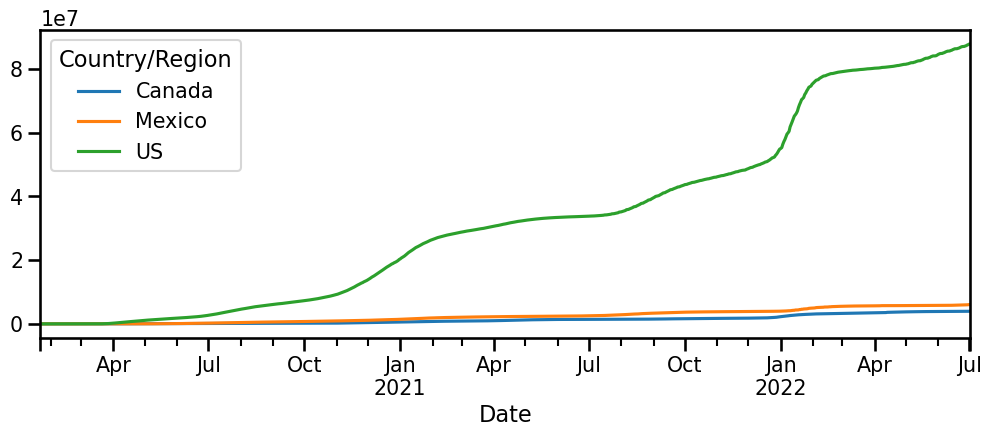

In [153]:
ax = unstacked['Confirmed'].plot()



## Selecting 1 Country to Analyze

To continue our exploration of the data, let's separate the US from the rest of the datasets (but keep all the dates). 

In [154]:
ts_us = df_ts.loc['US', 'Confirmed']
ts_us.index



DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-02'],
              dtype='datetime64[ns]', name='Date', length=893, freq='D')

  - As we can see, we have a successfully created our time series for the use with a proper datetime index.

Now we can plot our time series data.

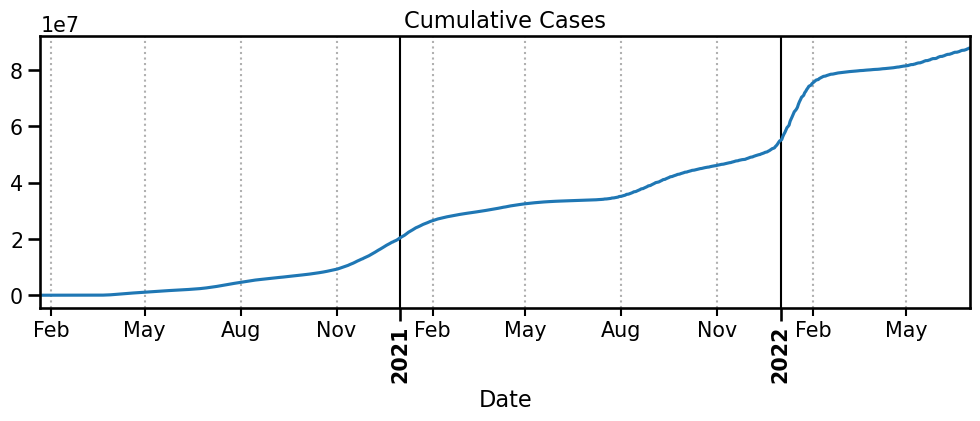

In [155]:
ax = ts_us.plot(style='-',title="Cumulative Cases");
format_xdates(ax);



### Drilling Down into the US

We want to get a more detailed view of what happening in specific states in the U.S.

- Slice out just values for the US into a new dataframe.
- Check the Province/State column for us states

In [156]:
## check for states
df_us = melted[melted['Country/Region']=='US']
df_us



Province/State Country/Region  Confirmed
Date                                               
2020-01-22            NaN             US          1
2020-01-23            NaN             US          1
2020-01-24            NaN             US          2
2020-01-25            NaN             US          2
2020-01-26            NaN             US          5
...                   ...            ...        ...
2022-06-28            NaN             US   87296327
2022-06-29            NaN             US   87490815
2022-06-30            NaN             US   87627486
2022-07-01            NaN             US   87821971
2022-07-02            NaN             US   87838623

[893 rows x 3 columns]

In [157]:
df_us['Province/State'].unique()



array([nan], dtype=object)

- Unfortunately, this dataset doesn't include the level of detail we want!
- To explore Covid cases by state, we will use a different data set.
- We will start the state-based analysis in the next lesson.


**Summary**

This lesson demonstrated a wide-form data set and how to convert it to long form. Once in long-form, we created a multiIndex which allowed us to keep our data grouped by country as well as date. We filtered and sliced using our multiIndex and learned how to unstack our dataframe to make plots with a multiIndex. 

# Plotting Data with Different Units

In a previous lesson, we wanted to explore Covid cases by state, but our previous data did not provide sufficient detail. We will start this lesson with a different data set for our analysis. Our goal will be to visualize both cases and deaths on one plot for a given state.


**Kaggle: US County JHU Data**

Download the covid_us_county-dojo.csv from this Share URL. Original Source: Kaggle and upload it to your Jupyter notebook.




In [159]:
df = pd.read_csv("covid_us_county.csv")
display(df.head())
df.info()



fips   county    state        lat       long        date  cases  \
0  1001.0  Autauga  Alabama  32.539527 -86.644082  2020-01-22      0   
1  1001.0  Autauga  Alabama  32.539527 -86.644082  2020-01-23      0   
2  1001.0  Autauga  Alabama  32.539527 -86.644082  2020-01-24      0   
3  1001.0  Autauga  Alabama  32.539527 -86.644082  2020-01-25      0   
4  1001.0  Autauga  Alabama  32.539527 -86.644082  2020-01-26      0   

  state_code  deaths  
0         AL       0  
1         AL       0  
2         AL       0  
3         AL       0  
4         AL       0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017826 entries, 0 to 3017825
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   fips        float64
 1   county      object 
 2   state       object 
 3   lat         float64
 4   long        float64
 5   date        object 
 6   cases       int64  
 7   state_code  object 
 8   deaths      int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 207.2+ MB


- Thankfully, this dataset is already in long-form, so that will minimize our preprocessing!
- Let's do a state-wise analysis. So we will be combining the values for all counties in each state.

In [160]:
df['state_code'].unique()



array(['AL', 'AK', nan, 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

- Why is there a null value (nan) in state_code?

In [161]:
## checking rows missing state_code
check = df[df['state_code'].isna()]
check



fips county           state      lat      long        date  cases  \
92106    60.0    NaN  American Samoa -14.2710 -170.1320  2020-01-22      0   
92107    60.0    NaN  American Samoa -14.2710 -170.1320  2020-01-23      0   
92108    60.0    NaN  American Samoa -14.2710 -170.1320  2020-01-24      0   
92109    60.0    NaN  American Samoa -14.2710 -170.1320  2020-01-25      0   
92110    60.0    NaN  American Samoa -14.2710 -170.1320  2020-01-26      0   
...       ...    ...             ...      ...       ...         ...    ...   
2718025  78.0    NaN  Virgin Islands  18.3358  -64.8963  2022-07-08  21103   
2718026  78.0    NaN  Virgin Islands  18.3358  -64.8963  2022-07-09  21103   
2718027  78.0    NaN  Virgin Islands  18.3358  -64.8963  2022-07-10  21103   
2718028  78.0    NaN  Virgin Islands  18.3358  -64.8963  2022-07-11  21175   
2718029  78.0    NaN  Virgin Islands  18.3358  -64.8963  2022-07-12  21231   

        state_code  deaths  
92106          NaN       0  
92107          NaN       0  
92108          NaN       0  
92109          NaN       0  
92110          NaN       0  
...            ...     ...  
2718025        NaN     119  
2718026        NaN     119  
2718027        NaN     119  
2718028        NaN     119  
2718029        NaN     120  

[80367 rows x 9 columns]

In [162]:
check['state'].unique()



array(['American Samoa', 'Diamond Princess', 'District of Columbia',
       'Grand Princess', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands'], dtype=object)

- Ah, OK. There are several territories owned by the US that are not technically a state and therefore do not have a 2-letter state code.
- Let's add a state code for:
    - American Samoa (AS)
    - the District of Columbia (DC)
    - Guam (GU)
    - Northern Mariana Islands (MP)
    - Puerto Rico" (PR)
    - Virgin Islands (VI)
- Also, it looks like cases from several cruise ships were listed (Diamond Princess and Grand Princess). Let's summarize these into one code for "cruise"
    - Diamond Princess or Grand Princess (CR)

In [163]:
df.loc[ df['state']== 'American Samoa', 'state_code'] = "AS"
df.loc[ df['state']=='District of Columbia', 'state_code'] = "DC"
df.loc[ df['state']== 'Guam', 'state_code'] = "GU"
df.loc[ df['state']== 'Northern Mariana Islands ', 'state_code'] = "MP"
df.loc[ df['state']=='Puerto Rico', 'state_code'] = "PR"
df.loc[ df['state']=='Virgin Islands', 'state_code'] = "VI"
df.loc[ (df['state']=='Diamond Princess') | (df['state']=='Grand Princess'), 'state_code'] = "CR"
## confirming DC is in the state_code column
df['state_code'].unique()



array(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'CR', 'DC',
       'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
       'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NM', 'NY', 'NC', 'ND', nan, 'OH', 'OK', 'OR', 'PA', 'PR',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV',
       'WI', 'WY'], dtype=object)

## Prepare Datetime Index
We will convert our 'date' column to datetime and set this column as our index.

In [164]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df



fips   county    state        lat        long  cases  \
date                                                                  
2020-01-22   1001.0  Autauga  Alabama  32.539527  -86.644082      0   
2020-01-23   1001.0  Autauga  Alabama  32.539527  -86.644082      0   
2020-01-24   1001.0  Autauga  Alabama  32.539527  -86.644082      0   
2020-01-25   1001.0  Autauga  Alabama  32.539527  -86.644082      0   
2020-01-26   1001.0  Autauga  Alabama  32.539527  -86.644082      0   
...             ...      ...      ...        ...         ...    ...   
2022-07-08  56045.0   Weston  Wyoming  43.839612 -104.567488   1667   
2022-07-09  56045.0   Weston  Wyoming  43.839612 -104.567488   1667   
2022-07-10  56045.0   Weston  Wyoming  43.839612 -104.567488   1667   
2022-07-11  56045.0   Weston  Wyoming  43.839612 -104.567488   1667   
2022-07-12  56045.0   Weston  Wyoming  43.839612 -104.567488   1706   

           state_code  deaths  
date                           
2020-01-22         AL       0  
2020-01-23         AL       0  
2020-01-24         AL       0  
2020-01-25         AL       0  
2020-01-26         AL       0  
...               ...     ...  
2022-07-08         WY      19  
2022-07-09         WY      19  
2022-07-10         WY      19  
2022-07-11         WY      19  
2022-07-12         WY      20  

[3017826 rows x 8 columns]

## Visualizing Time Series with Different Magnitudes

First, we will drop columns that are not needed:

In [165]:
# drop unneeded columns
df = df.drop(columns=['fips','lat','long'])



Now we will resample with daily frequency and we will group our county data together by state_code. We will aggregate our data with .sum() to get the total number of cases per state each day. 

In [166]:
## resample as daily freq by state
df_ts = df.groupby("state_code").resample("D").sum()
df_ts



county  \
state_code date                                                            
AK         2020-01-22  Aleutians EastAleutians WestAnchorageBethelBri...   
           2020-01-23  Aleutians EastAleutians WestAnchorageBethelBri...   
           2020-01-24  Aleutians EastAleutians WestAnchorageBethelBri...   
           2020-01-25  Aleutians EastAleutians WestAnchorageBethelBri...   
           2020-01-26  Aleutians EastAleutians WestAnchorageBethelBri...   
...                                                                  ...   
WY         2022-07-08  AlbanyBig HornCampbellCarbonConverseCrookFremo...   
           2022-07-09  AlbanyBig HornCampbellCarbonConverseCrookFremo...   
           2022-07-10  AlbanyBig HornCampbellCarbonConverseCrookFremo...   
           2022-07-11  AlbanyBig HornCampbellCarbonConverseCrookFremo...   
           2022-07-12  AlbanyBig HornCampbellCarbonConverseCrookFremo...   

                                                                   state  \
state_code date                                                            
AK         2020-01-22  AlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlas...   
           2020-01-23  AlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlas...   
           2020-01-24  AlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlas...   
           2020-01-25  AlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlas...   
           2020-01-26  AlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlas...   
...                                                                  ...   
WY         2022-07-08  WyomingWyomingWyomingWyomingWyomingWyomingWyom...   
           2022-07-09  WyomingWyomingWyomingWyomingWyomingWyomingWyom...   
           2022-07-10  WyomingWyomingWyomingWyomingWyomingWyomingWyom...   
           2022-07-11  WyomingWyomingWyomingWyomingWyomingWyomingWyom...   
           2022-07-12  WyomingWyomingWyomingWyomingWyomingWyomingWyom...   

                        cases  \
state_code date                 
AK         2020-01-22       0   
           2020-01-23       0   
           2020-01-24       0   
           2020-01-25       0   
           2020-01-26       0   
...                       ...   
WY         2022-07-08  165619   
           2022-07-09  165619   
           2022-07-10  165619   
           2022-07-11  165619   
           2022-07-12  167386   

                                                              state_code  \
state_code date                                                            
AK         2020-01-22  AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...   
           2020-01-23  AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...   
           2020-01-24  AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...   
           2020-01-25  AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...   
           2020-01-26  AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...   
...                                                                  ...   
WY         2022-07-08  WYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWY...   
           2022-07-09  WYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWY...   
           2022-07-10  WYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWY...   
           2022-07-11  WYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWY...   
           2022-07-12  WYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWY...   

                       deaths  
state_code date                
AK         2020-01-22       0  
           2020-01-23       0  
           2020-01-24       0  
           2020-01-25       0  
           2020-01-26       0  
...                       ...  
WY         2022-07-08    1834  
           2022-07-09    1834  
           2022-07-10    1834  
           2022-07-11    1834  
           2022-07-12    1845  

[50568 rows x 5 columns]

Now let's explore one state. We will start with New York (NY). We would like to visualize BOTH cases and deaths on the same figure. Here is a starting point:

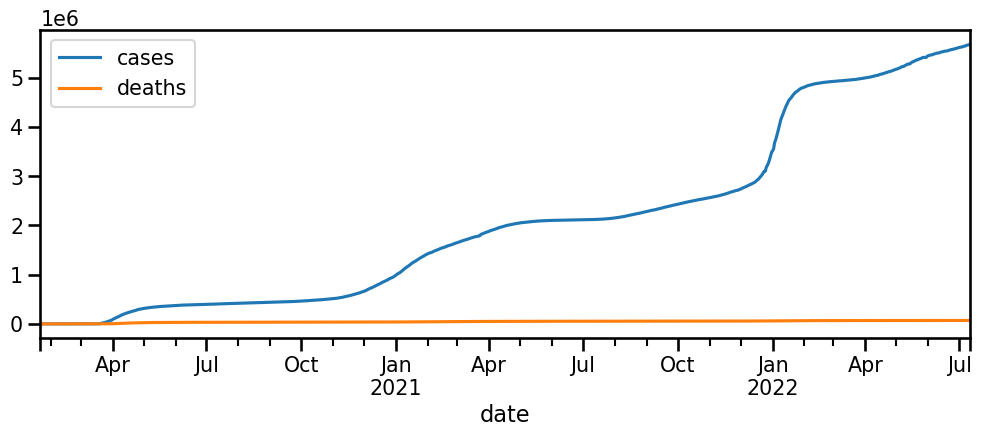

In [167]:
state_ts = df_ts.loc['NY'].copy()
ax = state_ts.plot();



- As we can see, this makes it much more difficult to read the # of cases for deaths, since they are much lower than the # of cases.
- We can use twin axes to plot the deaths on the right y-axis so that it can be scaled differently to allow us to see the changes.

## Using twin axes

To use twin axes, we first make our fig and ax. The best way is using plt.subplots()

- Once we have our ax, we will save a new ax from ax.twinx()
- We will use our ax

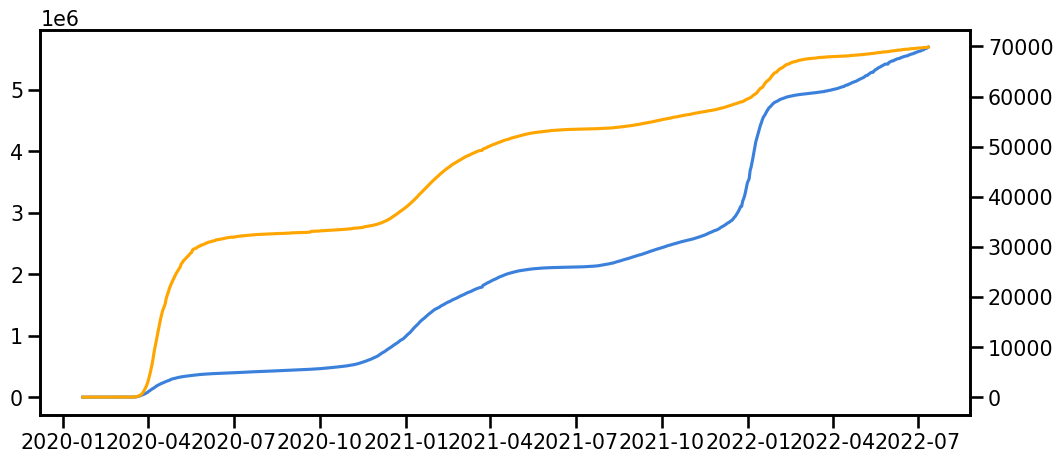

In [168]:
fig, ax1 = plt.subplots(figsize=(12,5))
## Plot first line on original ax
ax1.plot(state_ts.index, state_ts['cases'] ,color='#3b81db',label='Cases')
# Make twin axis and plot second line
ax2 = ax1.twinx()
ax2.plot(state_ts.index ,state_ts['deaths'],label='Deaths',color='orange')


Now you can see that different scales are being used for the cases and the deaths. Notice the discrepancy between the y-axis labels for cases (0 to 6e^6) and deaths (0 to 70,000). The deaths line(orange line) is no longer flat so we are able to see the cumulative increase in deaths over time. This visual still needs some work. Let's improve it by adding a legend.

**Adding a legend to twin axis**

Once we have used 2 axes in 1 graph, legends start to become more difficult to use. The last legend displayed (ax1 vs ax2) will obscure the second one. There is a workaround for this, which is adapted from this original Source.

- We must manually reconstruct a legend by giving ax1.legend() the lines and labels for the lines.
- We can get the lines using: lines = ax1.get_lines() + ax2.get_lines() to get the lines themselves.
- We can get labels using: labels = [l.get_label() for l in lines]
- We can then use ax1.legend(lines, labels) to add the legend.
    - Note: it doesn't matter which of the 2 axes you use for ax1.legend().

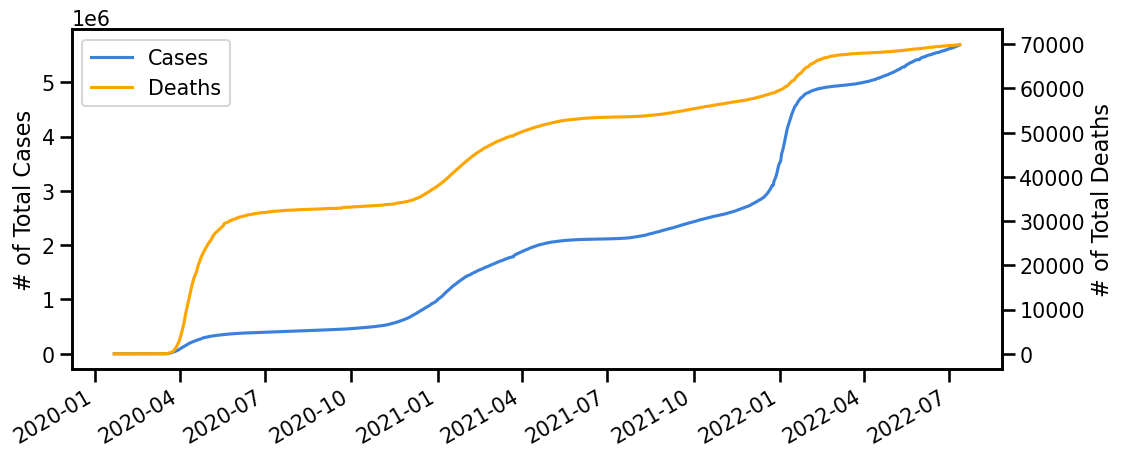

In [169]:
# Solution for having two legends
# Source: https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(state_ts.index, state_ts['cases'] ,color='#3b81db',label='Cases')
ax1.set_ylabel("# of Total Cases")
# Make twin axis
ax2 = ax1.twinx()
ax2.plot(state_ts.index ,state_ts['deaths'],label='Deaths',color='orange')
ax2.set_ylabel("# of Total Deaths")
## Removing the grids
ax1.grid(False)
ax2.grid(False)
## Making joined legend
lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc=0);
fig.autofmt_xdate()



The legend is necessary and looks great! Now we can customize the formatting of large tick values in a very similar fashion as we formatted date ticks.

Before we add more customization, let's wrap our progress so far in a function:

In [170]:
def plot_compare_cols(state_ts,col1='cases',color1='#3b81db',
                      col2='deaths',color2='orange',
                     ylabel1="# of Total Cases", ylabel2="# of Total Deaths",
                     figsize=(12,5)):
    """#Solution for having two legends
    # Source: https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
    """
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(state_ts.index, state_ts[col1] ,color=color1,label=col1.title())
    ax1.set_ylabel(ylabel1)
    # Make twin axis
    ax2 = ax1.twinx()
    ax2.plot(state_ts.index ,state_ts[col2],label=col2.title(),color=color2)
    ax2.set_ylabel(ylabel2)
    ## Removing the grids
    ax1.grid(False)
    ax2.grid(False)
    ## Making joined legend
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [l.get_label() for l in lines]
    ax2.legend(lines, labels, loc=0);
    fig.autofmt_xdate()
    return fig, (ax1,ax2)



Now let's test our function on the New York data:

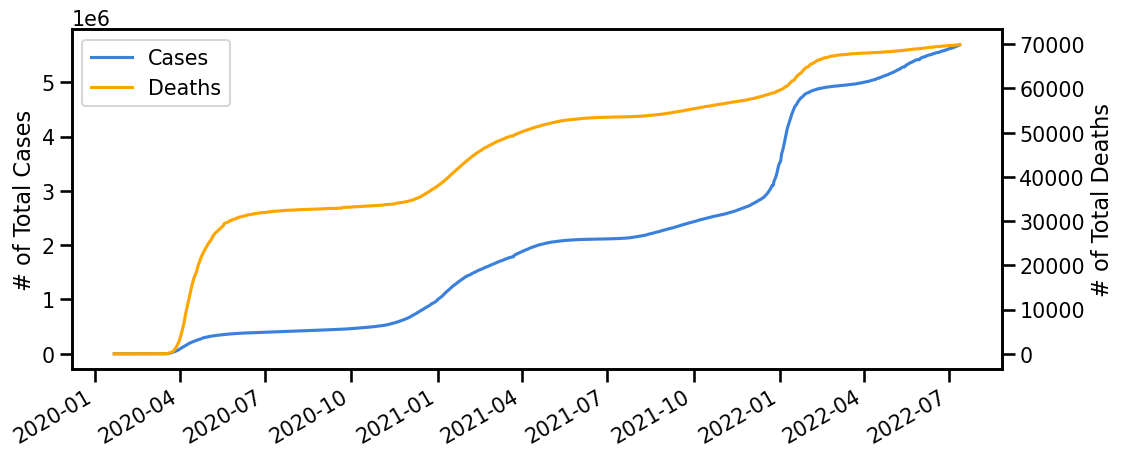

In [171]:
fig,(ax1,ax2) = plot_compare_cols(state_ts)



## Formatting Non-Date Ticks Using matplotlib.ticker

We previously introduced the matplotlib.dates module (which we called mdates).

- There are also tick formatters/locators for non-date ticks in matplotlib.ticker

**Tick Formatting - Large #'s**

In the figure above, we can see that the y-axis is using scientific notation (notice the 1e6 at the top of the left y-axis).

Let's discuss 2 tick formatters that may be appropriate for our use case. - the StrMethodFormatter - the FuncFormatter

In [172]:
import matplotlib.ticker as mticks



## StrMethodFormatter

- We will use the StrMethodFormatter which uses Python string format codes to change the tick label text.
- We provide a string format that will look very similar to an f-string. Meaning that it will use curly brackets around a string that contains the variable x and a : followed by a format code. However, it won't actually apply the formatting and won't include the f.
    - Reference: String Format Codes
- Let's make our cases ticks look more professional
    - Add a , separator for thousands
    - Show 0 decimal places
- Tutorial Example

In [173]:
str_fmt = mticks.StrMethodFormatter("{x:,.0f}")
str_fmt



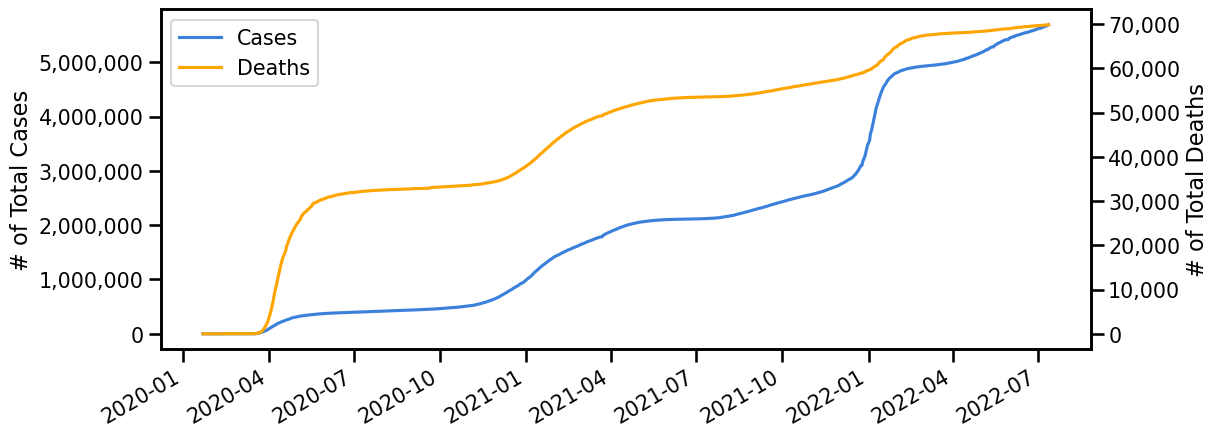

In [174]:
fig,(ax1,ax2) = plot_compare_cols(state_ts)
ax1.yaxis.set_major_formatter(str_fmt)
ax2.yaxis.set_major_formatter(str_fmt)



- This looks nice but adds a lot of unnecessary 0's to our y-axis.
- What if we wanted to convert our y-axis from the raw # of cases (e.g. 80,000,000) to millions (e.g. 80M)?
    - For this, we would need a more sophisticated tool - the FuncFormatter.

## Using the FuncFormatter

- The function formatter is a little more involved and requires that we create a function that accepts: x (the actual value for the tick), and pos (a value for tracking position - used by matplotlib).
- It then must return a string with the desired tick label for each x.
- Example: How to use the FuncFormatter to convert raw units to millions with an "M" (e.g. "12M")
- To use the Function Formatter:
    - Create a function that accepts 2 arguments: x and pos.
    - Calculate whatever modification to x is required.
    - Use f-strings and format codes to specify how to change x.
        - e.g. f"{x*1e-6:,}M" would convert "2,000,000" -> "2M"

**Tip: Writing large numbers in Python.**

- While we can write out the large values without any issue with Python, it can be hard for a human to read at a glance when there are many 0's with no separator
    - e.g. 10 million=10000000
- You may also know that we can also use scientific notation with Python using 1e followed by the number of 0's.
    - For example:
        - 10 thousand = 1e4
        - 1 million = 1e6
        - 10 million =1e7
- One additional trick that you probably DON'T know is that Python will let you use an underscore as a separator for large values without it causing any issues.
    - For example:
        - 10 million: 10_000_000
- So when typing large numeric values, try out the approaches above and see what feels most intuitive for you!

In [175]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)


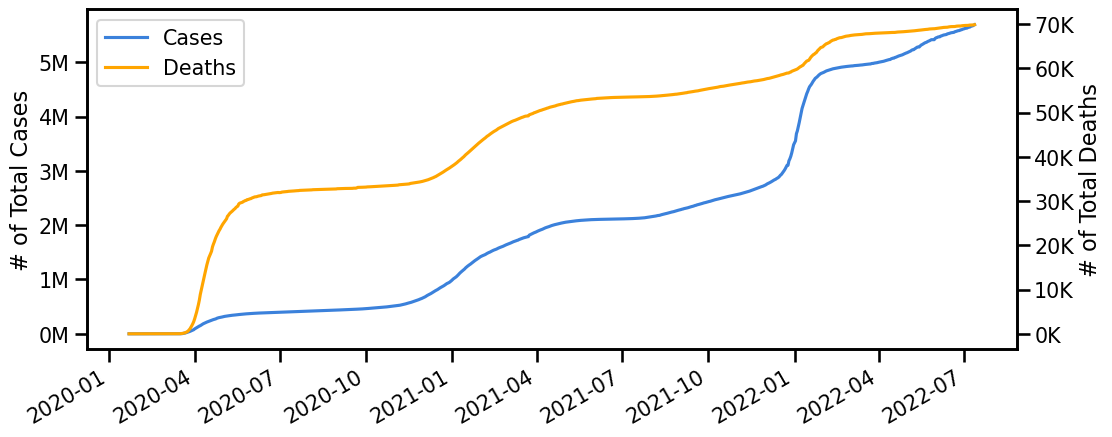

In [176]:
fig,(ax1,ax2) = plot_compare_cols(state_ts)
## Set the axis' major formatter
ax1.yaxis.set_major_formatter(fmt_mill)
ax2.yaxis.set_major_formatter(fmt_thous)



## Combining Our Tick Formatting with Date Formatting

In [177]:
# create the locator to place ticks every 1 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")



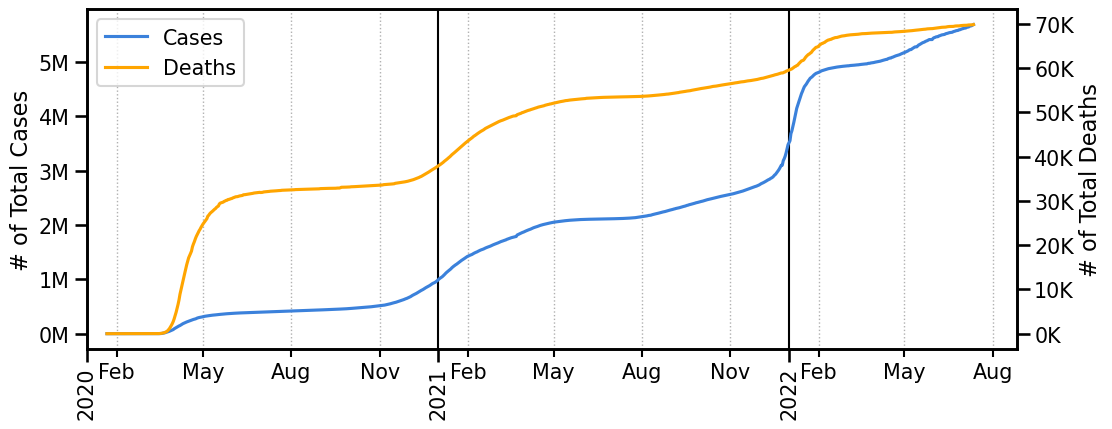

In [178]:
final_fig,(ax1,ax2) = plot_compare_cols(state_ts)
ax1.set_xlim(left=pd.to_datetime('01/2020'))
## Set the y-axes major formatters
ax1.yaxis.set_major_formatter(fmt_mill)
ax2.yaxis.set_major_formatter(fmt_thous)
## customize minor ticks
ax1.xaxis.set_minor_locator(loc_3months)
ax1.xaxis.set_minor_formatter(fmt_months)
# ## customize major ticks
ax1.xaxis.set_major_locator(loc_year)
ax1.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually different
ax1.grid(which='minor',axis='x',ls=":",lw=1)
ax1.grid(which='major',axis='x',color='k')
final_fig.autofmt_xdate(which='major',rotation=90,ha='center')



**Summary**

This lesson demonstrated how to make a graph with two axes to show two data points simultaneously for the same time series. You learned how to add a legend to visuals with twin axis, and did some customization to your tick formats and labels. Finally, you combined this with the code you had used previously to make your date tick lines and labels pop. 

# Time Series Stats


**Cumulative Data vs New Data**

We will continue to work with our county Covid data that has been grouped by state.

In [179]:
df_ts



county  \
state_code date                                                            
AK         2020-01-22  Aleutians EastAleutians WestAnchorageBethelBri...   
           2020-01-23  Aleutians EastAleutians WestAnchorageBethelBri...   
           2020-01-24  Aleutians EastAleutians WestAnchorageBethelBri...   
           2020-01-25  Aleutians EastAleutians WestAnchorageBethelBri...   
           2020-01-26  Aleutians EastAleutians WestAnchorageBethelBri...   
...                                                                  ...   
WY         2022-07-08  AlbanyBig HornCampbellCarbonConverseCrookFremo...   
           2022-07-09  AlbanyBig HornCampbellCarbonConverseCrookFremo...   
           2022-07-10  AlbanyBig HornCampbellCarbonConverseCrookFremo...   
           2022-07-11  AlbanyBig HornCampbellCarbonConverseCrookFremo...   
           2022-07-12  AlbanyBig HornCampbellCarbonConverseCrookFremo...   

                                                                   state  \
state_code date                                                            
AK         2020-01-22  AlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlas...   
           2020-01-23  AlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlas...   
           2020-01-24  AlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlas...   
           2020-01-25  AlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlas...   
           2020-01-26  AlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlas...   
...                                                                  ...   
WY         2022-07-08  WyomingWyomingWyomingWyomingWyomingWyomingWyom...   
           2022-07-09  WyomingWyomingWyomingWyomingWyomingWyomingWyom...   
           2022-07-10  WyomingWyomingWyomingWyomingWyomingWyomingWyom...   
           2022-07-11  WyomingWyomingWyomingWyomingWyomingWyomingWyom...   
           2022-07-12  WyomingWyomingWyomingWyomingWyomingWyomingWyom...   

                        cases  \
state_code date                 
AK         2020-01-22       0   
           2020-01-23       0   
           2020-01-24       0   
           2020-01-25       0   
           2020-01-26       0   
...                       ...   
WY         2022-07-08  165619   
           2022-07-09  165619   
           2022-07-10  165619   
           2022-07-11  165619   
           2022-07-12  167386   

                                                              state_code  \
state_code date                                                            
AK         2020-01-22  AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...   
           2020-01-23  AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...   
           2020-01-24  AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...   
           2020-01-25  AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...   
           2020-01-26  AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...   
...                                                                  ...   
WY         2022-07-08  WYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWY...   
           2022-07-09  WYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWY...   
           2022-07-10  WYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWY...   
           2022-07-11  WYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWY...   
           2022-07-12  WYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWYWY...   

                       deaths  
state_code date                
AK         2020-01-22       0  
           2020-01-23       0  
           2020-01-24       0  
           2020-01-25       0  
           2020-01-26       0  
...                       ...  
WY         2022-07-08    1834  
           2022-07-09    1834  
           2022-07-10    1834  
           2022-07-11    1834  
           2022-07-12    1845  

[50568 rows x 5 columns]

- Let's select 1 feature from 1 state to use for demonstration.
    - We will use cases from NY, but you should try another state and/or feature!

## Converting Cumulative Values to Delta Values

In a previous lesson, we made a high-quality plot for cases and deaths in New York, but let's just pull up a quick plot here to refresh our memory:

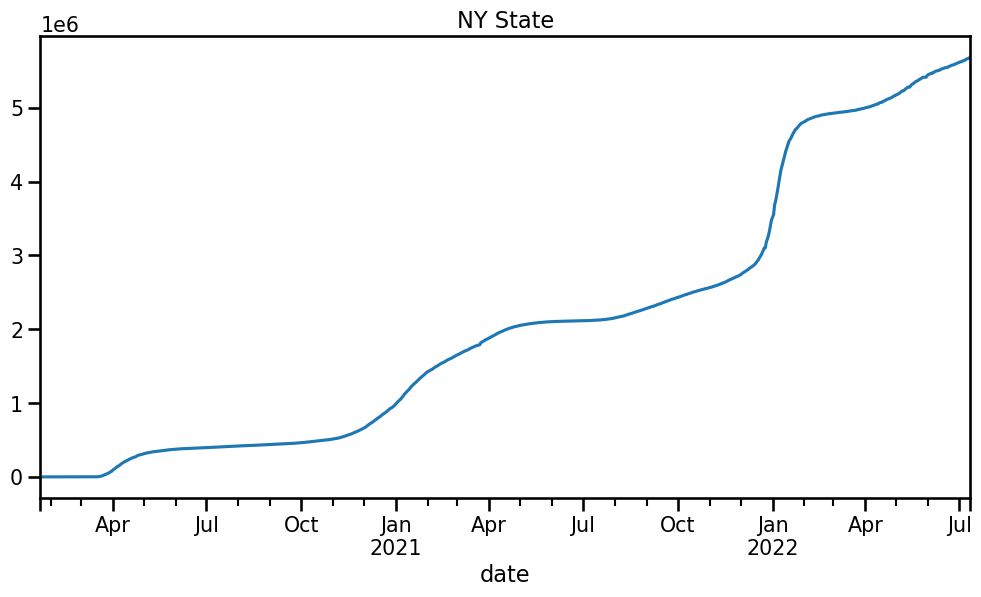

In [180]:
## quick visualization
state_code = "NY"
state_ts = df_ts.loc[state_code].copy()
axes = state_ts['cases'].plot(figsize=(12,6),title=f"{state_code} State")



We can see above that our time series always increases. The Covid data is actually the cumulative number of cases.

- What if we wanted to visualize just the NEW cases?

**.diff()**

- We can use ts.diff(), which will subtract the previous row from the next row, turning our cumulative data into New Daily Cases.
    - It calculates the DIFFERENCE between each row and the prior row by default (to calculate the difference between other # of rows, you can use the periods argument.)
    - This will create 1 null value at the beginning of the time series since there is no prior row to subtract.

In [181]:
ts_diff = state_ts.diff()
ts_diff



TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [182]:
ax = ts_diff['cases'].plot(title='# of Cases - Differenced')



NameError: name 'ts_diff' is not defined

- Ah, now that looks much more informative, in terms of the day-to-day changes in case counts.
- It looks pretty jagged though. Did we do something wrong?
    - No! Time series will often have random fluctuations that can make it difficult to see the big-picture.
    - Most of the visuals of Covid data that you've seen in the news have likely been moving averages, which smooths out the day-to-day fluctuations.

**Cumulative Sum (.cumsum()) is the Inverse of .diff()**

- Additionally, if we start with day-to-day data, we can do the opposite manipulation. We can convert new values/delta values into a cumulative total by using .cumsum()
- This will take us back to where we started with this data set, but we will demo the process below:

In [183]:
ts_sum = ts_diff.cumsum()
ax = ts_sum['cases'].plot(title='Cumulative Sum vs Original Data',
                          label='Summed Diff Data',color='black',lw=5)
state_ts['cases'].plot(ax=ax,label='Original Data',color='red',lw=2,ls='--')
ax.legend();



NameError: name 'ts_diff' is not defined

-  As we can see in the figure above, summing the differenced data produces the same cumulative values that we originally had.

**Rolling Statistics**

To help us see what is happening, we will select a smaller time period. We will limit our data to Oct 2021 through July 2022. 

In [ ]:
## selecting a single feature and smaller time period for demonstration
ts = ts_diff.loc['10/2021':'7/2022','cases'].copy().dropna()
ts.plot();



- Like .resample(), Pandas has a .rolling() method, which is designed for calculating rolling statistics across a fixed window size.
    - It accepts a window size (how many rows/time steps should be averaged together).
    - It also requires some form of aggregation to produce the final data.
- Let's try calculating the 7-day moving average for our ts.

In [184]:
window = 7
ts_mean = ts.rolling(window).mean()
ts_mean



datetime
2013-01-01          NaN
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-07          NaN
                ...    
2016-12-26     9.404649
2016-12-27    10.035840
2016-12-28     9.054917
2016-12-29     7.636822
2016-12-30     5.759951
Name: wind_speed, Length: 1044, dtype: float64

- By calculating a rolling mean, notice we have created null values for the first 7 rows (the window size).

Now let's compare the plot of our raw daily counts with our 7-day moving average. 

C:\Users\admin\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\admin\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\admin\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
C:\Users\admin\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return sel

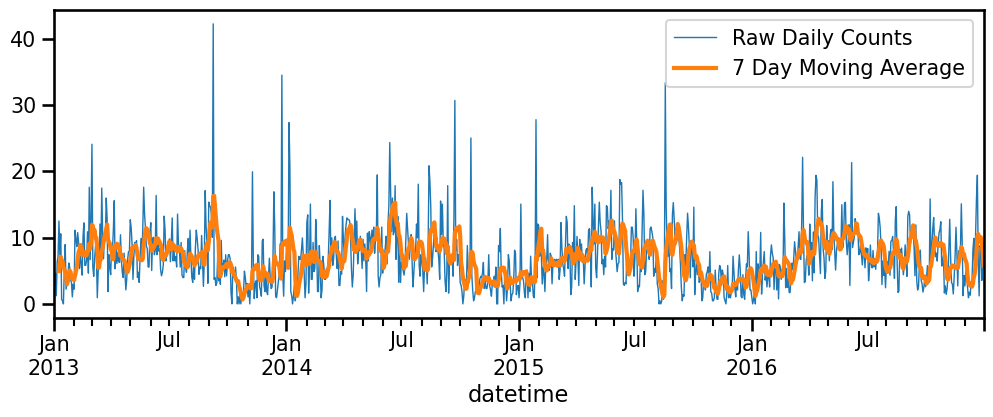

In [185]:
ax = ts.plot(label='Raw Daily Counts',lw=1)
ts_mean.plot(label=f'{window} Day Moving Average',ax=ax,lw=3)
ax.legend();



- While definitely not perfectly smooth, taking the 7-day moving average has made it easier to see the big-picture trend without getting distracted by the naturally occurring random fluctuations in daily values.

In [186]:
# we can also calculate rolling std()
std = ts.rolling(window).std()
std



datetime
2013-01-01         NaN
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-07         NaN
                ...   
2016-12-26    6.476724
2016-12-27    6.054270
2016-12-28    6.521001
2016-12-29    5.819154
2016-12-30    2.642906
Name: wind_speed, Length: 1044, dtype: float64

Now we will calculate the values within 1 standard deviation of the mean: 

In [188]:
## calculating +/- std
ts_stats= pd.DataFrame({'mean':ts_mean,
             'mean+std':ts_mean+std,
             'mean-std':ts_mean-std})
ts_stats = ts_stats.dropna()
ts_stats



mean   mean+std  mean-std
datetime                                  
2013-01-09   4.969932   9.171680  0.768184
2013-01-10   6.027075   9.662784  2.391366
2013-01-11   7.111565  10.818404  3.404725
2013-01-14   6.537755  10.938157  2.137353
2013-01-15   6.437075  10.984669  1.889481
...               ...        ...       ...
2016-12-26   9.404649  15.881373  2.927925
2016-12-27  10.035840  16.090109  3.981570
2016-12-28   9.054917  15.575918  2.533916
2016-12-29   7.636822  13.455976  1.817667
2016-12-30   5.759951   8.402857  3.117044

[1038 rows x 3 columns]

C:\Users\admin\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\admin\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\admin\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
C:\Users\admin\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return sel

<Axes: xlabel='datetime'>

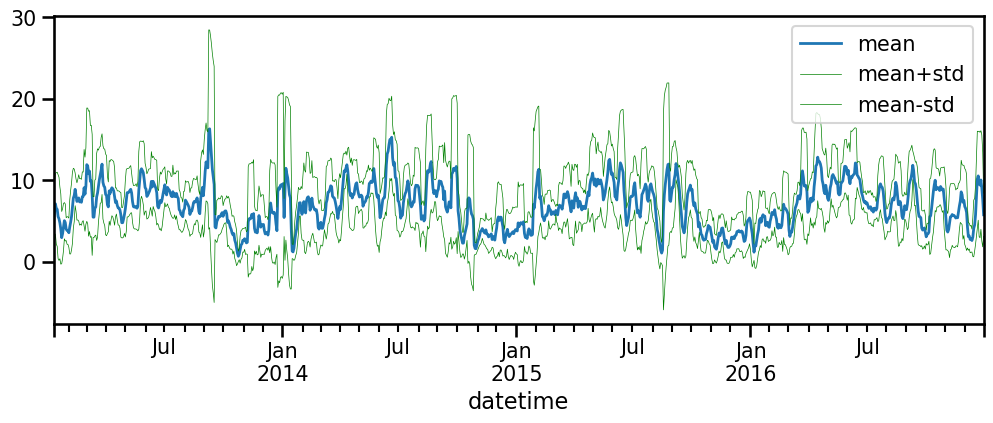

In [189]:
## plot the rolling mean +/- the rolling std
ax = ts_stats.plot(y='mean',lw=2)
ts_stats.plot(y='mean+std',color='g',lw=0.5,ax=ax)
ts_stats.plot(y='mean-std',color='g',lw=0.5,ax=ax)


We can use ax.fill_between to fill in the area between two sets of y-values.

C:\Users\admin\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\admin\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\admin\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
C:\Users\admin\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return sel

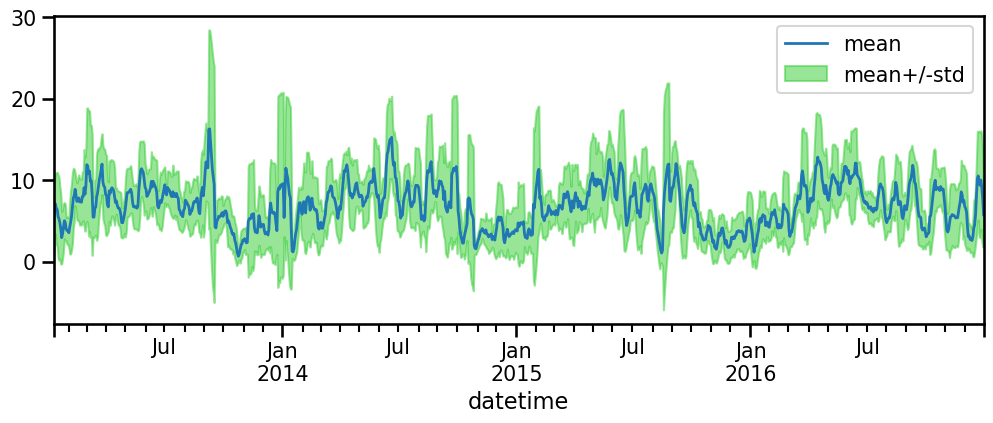

In [190]:
## plot the rolling mean +/- the rolling std
ax = ts_stats.plot(y='mean',lw=2)
ax.fill_between(ts_stats.index, ts_stats['mean+std'], ts_stats['mean-std'], color='limegreen', alpha=0.5,zorder=0,label="mean+/-std");
ax.legend();



In a future lesson, we will compare New York to another state.

**Summary**

This lesson used a Covid case study to demonstrate how to visualize Covid cases in New York. We converted between cumulative values and new values. We also smoothed our plot by visualizing a rolling average. 

# Normalizing Time Series

Normalizing Time Series

First, let's define the cases in NY and the cases in KY:

In [191]:
#Define each state's cases
ny_cases = df_ts.loc["NY",'cases']
ky_cases = df_ts.loc['KY','cases']


In [192]:
compare_ts = pd.DataFrame({'KY':ky_cases,
                          "NY":ny_cases})
compare_ts



KY       NY
date                        
2020-01-22        0        0
2020-01-23        0        0
2020-01-24        0        0
2020-01-25        0        0
2020-01-26        0        0
...             ...      ...
2022-07-08  1414766  5661360
2022-07-09  1414766  5665385
2022-07-10  1414766  5668645
2022-07-11  1419862  5679453
2022-07-12  1421037  5689878

[903 rows x 2 columns]

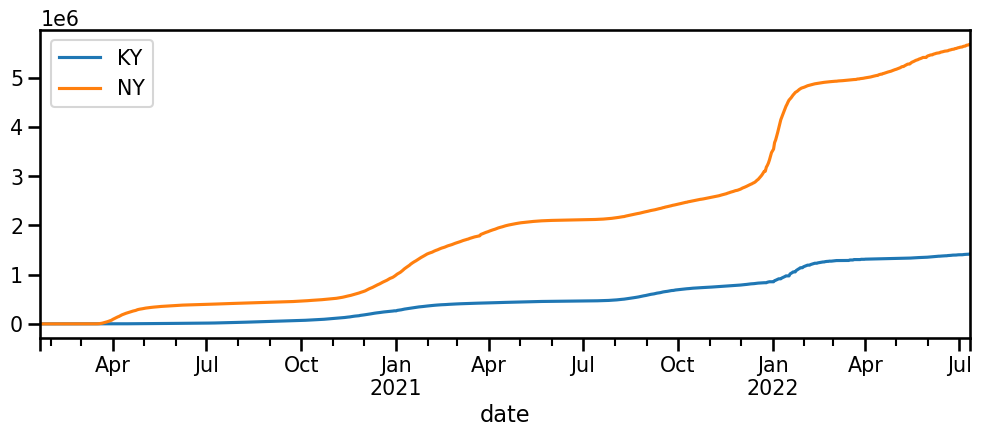

In [193]:
compare_ts.plot();



- Comparing Kentucky and New York cumulative cases makes it look like NY is ~3-4 times worse off than Kentucky.
    - But is this a fair conclusion?
- Let's examine the differenced # of cases and see if changing to non-cumulative values makes a difference.

In [194]:
compare_diff = compare_ts.diff().dropna()
compare_diff



KY       NY
date                       
2020-01-23     0.0      0.0
2020-01-24     0.0      0.0
2020-01-25     0.0      0.0
2020-01-26     0.0      0.0
2020-01-27     0.0      0.0
...            ...      ...
2022-07-08  2143.0  15343.0
2022-07-09     0.0   4025.0
2022-07-10     0.0   3260.0
2022-07-11  5096.0  10808.0
2022-07-12  1175.0  10425.0

[902 rows x 2 columns]

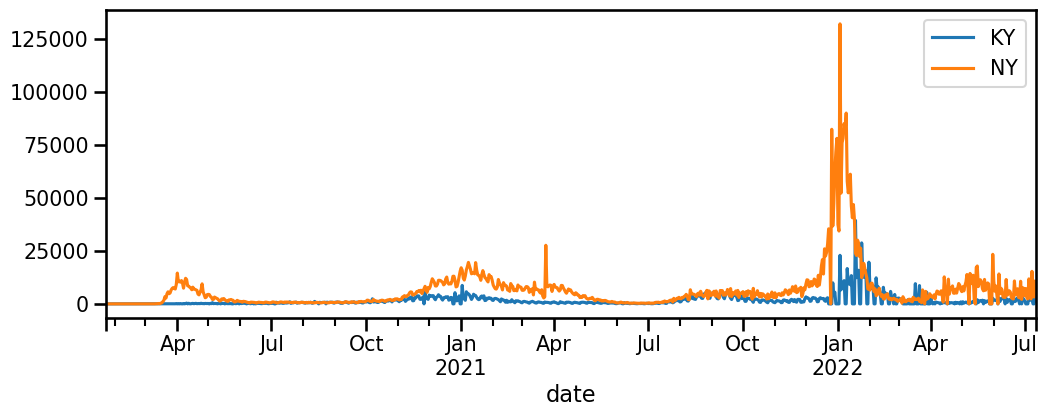

In [195]:
compare_diff.plot();



    - New York still has many more cases than Kentucky. But, considering the difference in population, does it makes sense that NY would have higher values?
    - What if we normalized the daily case counts so that we visualize the percent change from the previous day (instead of the raw # of cases)?

        - Pandas has a .pct_change() method that will calculate this for us!

**ts.pct_change()**

    Documentation:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

In [196]:
compare_pct = compare_ts.pct_change(freq='D')
compare_pct



KY        NY
date                          
2020-01-22       NaN       NaN
2020-01-23       NaN       NaN
2020-01-24       NaN       NaN
2020-01-25       NaN       NaN
2020-01-26       NaN       NaN
...              ...       ...
2022-07-08  0.001517  0.002717
2022-07-09  0.000000  0.000711
2022-07-10  0.000000  0.000575
2022-07-11  0.003602  0.001907
2022-07-12  0.000828  0.001836

[903 rows x 2 columns]

- Note: the name pct_change is slightly misleading, as we do not get the actual %'s but the ratio out of 1.

    - Multiple by 100 to get the actual percentage value.

In [197]:
compare_pct = compare_ts.pct_change(freq='D')*100
compare_pct



KY        NY
date                          
2020-01-22       NaN       NaN
2020-01-23       NaN       NaN
2020-01-24       NaN       NaN
2020-01-25       NaN       NaN
2020-01-26       NaN       NaN
...              ...       ...
2022-07-08  0.151704  0.271749
2022-07-09  0.000000  0.071096
2022-07-10  0.000000  0.057542
2022-07-11  0.360201  0.190663
2022-07-12  0.082755  0.183556

[903 rows x 2 columns]

- It makes sense that there would be some giant spikes in the percent change early in the pandemic. Let's cut out the earliest data from our visualization.

In [198]:
plot_ts = compare_pct.loc['07/2021':]
plot_ts



KY        NY
date                          
2021-07-01  0.035041  0.018487
2021-07-02  0.034384  0.023778
2021-07-03  0.039958  0.013517
2021-07-04  0.016320  0.016539
2021-07-05  0.015888  0.017576
...              ...       ...
2022-07-08  0.151704  0.271749
2022-07-09  0.000000  0.071096
2022-07-10  0.000000  0.057542
2022-07-11  0.360201  0.190663
2022-07-12  0.082755  0.183556

[377 rows x 2 columns]

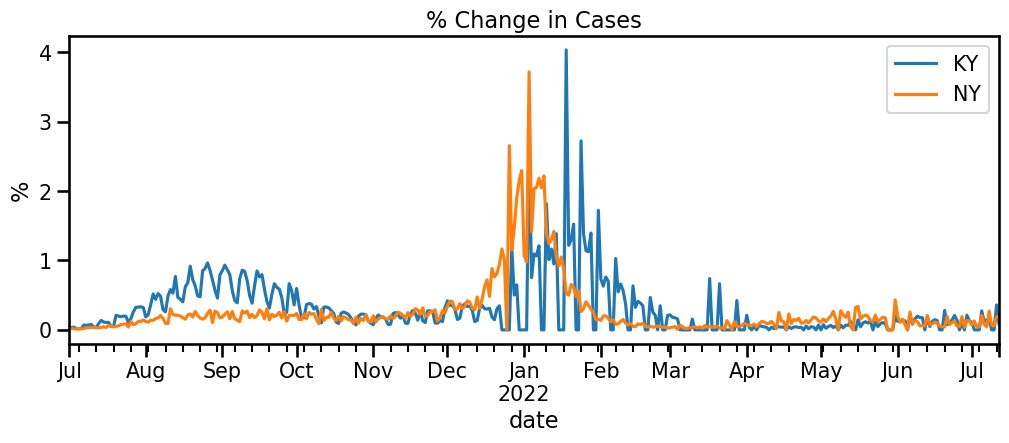

In [199]:
ax = plot_ts.plot(title='% Change in Cases',ylabel='%')



- Taking a rolling mean for visibility and compare against our original data.

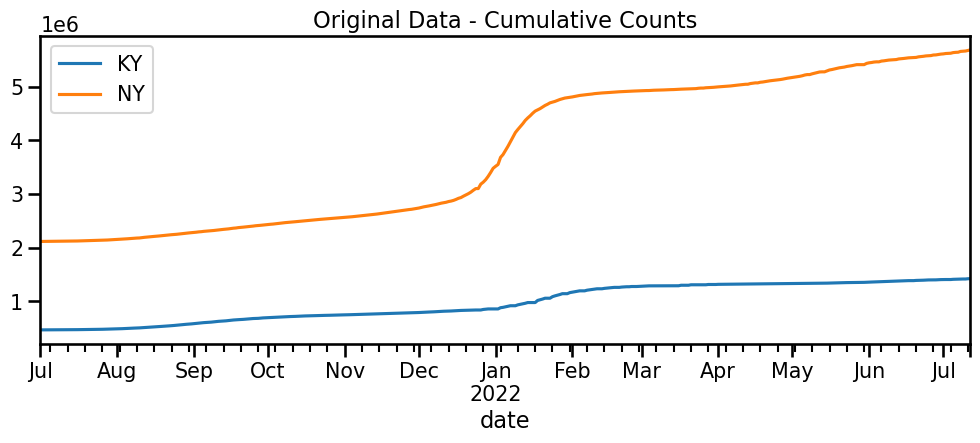

In [200]:
compare_ts.loc['07/2021':].plot(title='Original Data - Cumulative Counts');



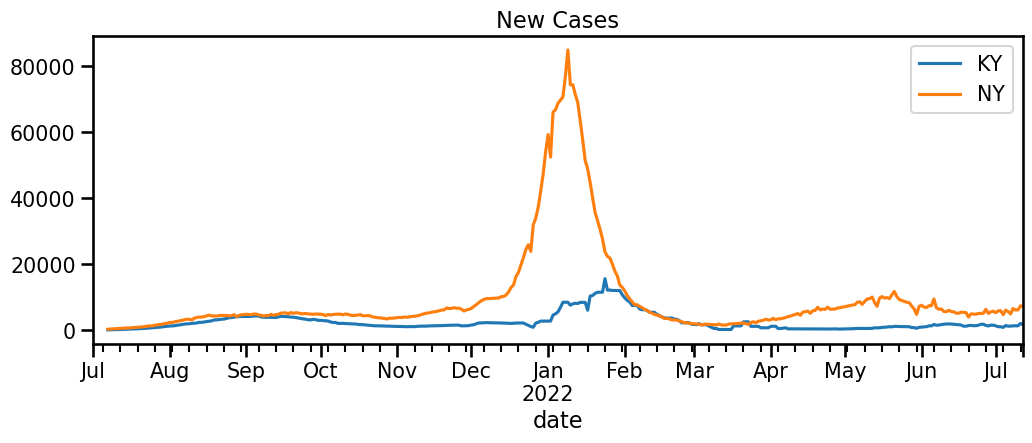

In [201]:
compare_diff.loc['07/2021':].rolling(7).mean().plot(title='New Cases');



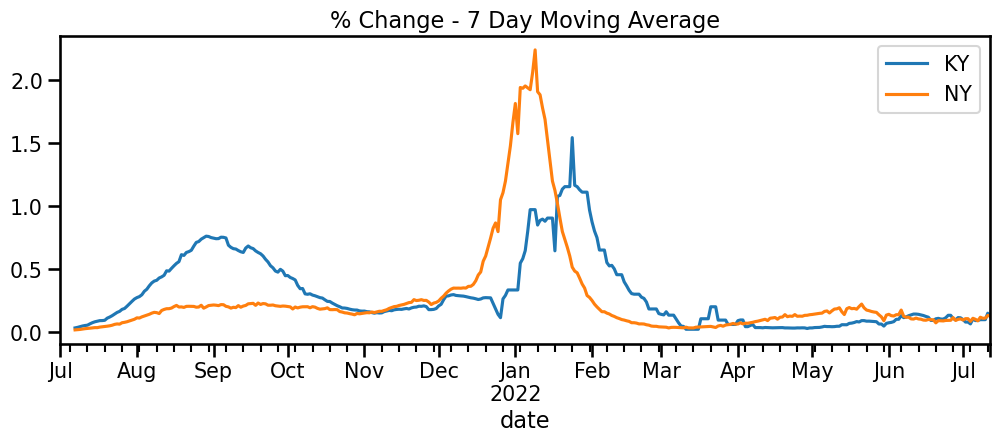

In [202]:
plot_ts = compare_pct.loc['07/2021':].rolling(window).mean()
plot_ts.plot(title='% Change - 7 Day Moving Average');



- Now that is a much more fair comparison! Here we can see that while NY had a higher percentage change vs KY at some points, there were also times when KY had a higher % change.

**Normalizing by Population**

- Let's try normalizing the case counts using the state population.
- A popular approach to this is to normalize the values to per 100,000 people (instead of per person))
- Since our Covid dataset does not include population, we will have to obtain this from another data set and merge it with our Covid data.
- We will use a Census dataset from Kaggle: 2019 Census US Population Data

In [204]:
us_pop = pd.read_csv('2019_Census_US_Population_Data_By_State_Lat_Long.csv')
us_pop.head()



STATE  POPESTIMATE2019        lat        long
0     Alabama          4903185  32.377716  -86.300568
1      Alaska           731545  58.301598 -134.420212
2     Arizona          7278717  33.448143 -112.096962
3    Arkansas          3017804  34.746613  -92.288986
4  California         39512223  38.576668 -121.493629

- In order to match the state population with the right abbreviation for the state, we need to either return to our original raw data and extract the mapping of Statename:state code OR we could acquire another file that has this information already paired.

In [205]:
state_lookup = df[['state','state_code']]
state_lookup = state_lookup.drop_duplicates(subset=['state']).reset_index(drop=True)
state_lookup.head()



state state_code
0         Alabama         AL
1          Alaska         AK
2  American Samoa         AS
3         Arizona         AZ
4        Arkansas         AR

In [206]:
## merging the us pop with our state lookup
merged_pop = pd.merge(us_pop[['STATE','POPESTIMATE2019']], state_lookup, left_on='STATE', right_on='state')
# merged_pop = merged_pop.drop(columns='state').set_index('state_code')
state_pop = merged_pop.set_index('state_code')['POPESTIMATE2019']
state_pop.head()



state_code
AL     4903185
AK      731545
AZ     7278717
AR     3017804
CA    39512223
Name: POPESTIMATE2019, dtype: int64

In [207]:
## example calc for KY
compare_ts['KY']/state_pop.loc['KY']*100_000



date
2020-01-22        0.000000
2020-01-23        0.000000
2020-01-24        0.000000
2020-01-25        0.000000
2020-01-26        0.000000
                  ...     
2022-07-08    31666.731204
2022-07-09    31666.731204
2022-07-10    31666.731204
2022-07-11    31780.795058
2022-07-12    31807.095103
Freq: D, Name: KY, Length: 903, dtype: float64

In [208]:
## preparing all columns using loop
compare_pop = compare_ts.copy()
for col in compare_ts.columns:
    compare_pop[col] =( compare_pop[col] / state_pop.loc[col])*100_000
compare_pop



KY            NY
date                                  
2020-01-22      0.000000      0.000000
2020-01-23      0.000000      0.000000
2020-01-24      0.000000      0.000000
2020-01-25      0.000000      0.000000
2020-01-26      0.000000      0.000000
...                  ...           ...
2022-07-08  31666.731204  29101.921237
2022-07-09  31666.731204  29122.611536
2022-07-10  31666.731204  29139.369394
2022-07-11  31780.795058  29194.927345
2022-07-12  31807.095103  29248.516506

[903 rows x 2 columns]

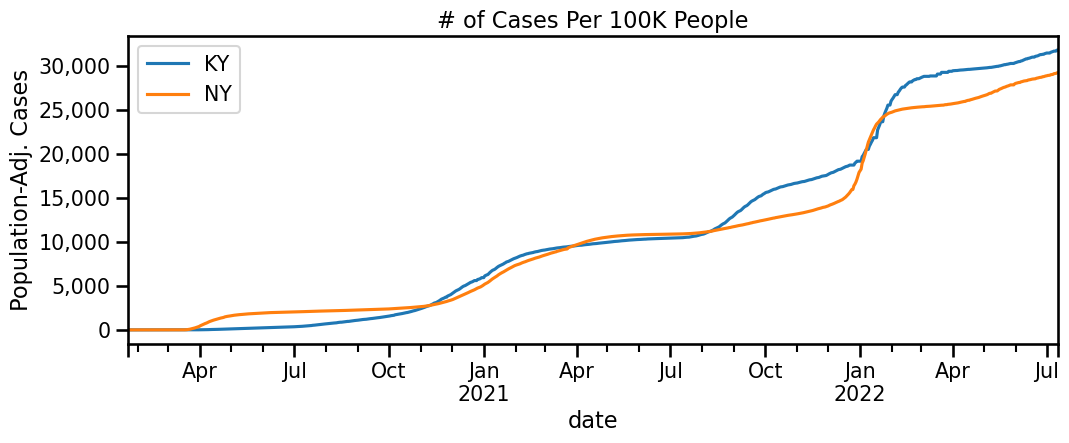

In [209]:
ax = compare_pop.plot(ylabel='Population-Adj. Cases',title='# of Cases Per 100K People');
ax.yaxis.set_major_formatter(str_fmt)



**Summary**

When making comparisons of groups of different sizes, you must normalize the data to make a meaningful comparison. You learned two methods of normalization. First percent change was used which would apply to just about any comparison. To best tell the story of our Covid data, however, we normalized the cases by population. 